In [516]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from scipy.stats import norm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [517]:
df=pd.read_csv('Crime_Incidents_in_2024.csv')
df.head()

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID
0,396384.27,137427.7600,24054605,2024/04/12 14:24:15+00,DAY,OTHERS,THEFT F/AUTO,1100 - 1199 BLOCK OF 18TH STREET NW,396384.270000,137427.760000,...,010700 1,10700.0,Precinct 17,38.904699,-77.041686,GOLDEN TRIANGLE,2024/04/12 06:33:00+00,2024/04/12 08:59:00+00,666213423,NaN
1,395709.91,137490.9400,24056000,2024/04/14 23:56:40+00,EVENING,OTHERS,THEFT/OTHER,2200 - 2299 BLOCK OF M STREET NW,395709.910000,137490.940000,...,005501 2,5501.0,Precinct 4,38.905265,-77.049461,NaN,2024/04/14 04:00:00+00,NaN,666213424,NaN
2,397497.55,137053.1300,24056385,2024/04/15 17:42:57+00,DAY,OTHERS,THEFT/OTHER,1200 - 1299 BLOCK OF I STREET NW,397497.550000,137053.130000,...,010100 2,10100.0,Precinct 129,38.901328,-77.028849,DOWNTOWN,2024/04/15 14:31:00+00,2024/04/15 15:18:00+00,666213769,NaN
3,400040.61,129046.4721,18060158,2024/07/30 04:00:00+00,MIDNIGHT,GUN,HOMICIDE,400 - 599 BLOCK OF CHESAPEAKE STREET SE,400040.610046,129046.472149,...,009802 2,9802.0,Precinct 125,38.829204,-76.999532,NaN,2018/04/15 16:07:00+00,2018/04/15 17:34:56+00,666236835,NaN
4,397171.11,137408.2500,24013789,2024/01/28 07:33:28+00,MIDNIGHT,OTHERS,THEFT/OTHER,1100 - 1199 BLOCK OF VERMONT AVENUE NW,397171.110000,137408.250000,...,010100 3,10100.0,Precinct 17,38.904526,-77.032614,DOWNTOWN,2024/01/28 06:41:00+00,2024/01/28 07:12:00+00,666239683,NaN


In [518]:
df.columns

Index(['X', 'Y', 'CCN', 'REPORT_DAT', 'SHIFT', 'METHOD', 'OFFENSE', 'BLOCK',
       'XBLOCK', 'YBLOCK', 'WARD', 'ANC', 'DISTRICT', 'PSA',
       'NEIGHBORHOOD_CLUSTER', 'BLOCK_GROUP', 'CENSUS_TRACT',
       'VOTING_PRECINCT', 'LATITUDE', 'LONGITUDE', 'BID', 'START_DATE',
       'END_DATE', 'OBJECTID', 'OCTO_RECORD_ID'],
      dtype='object')

In [519]:
df

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID
0,396384.2700,137427.7600,24054605,2024/04/12 14:24:15+00,DAY,OTHERS,THEFT F/AUTO,1100 - 1199 BLOCK OF 18TH STREET NW,396384.270000,137427.760000,...,010700 1,10700.0,Precinct 17,38.904699,-77.041686,GOLDEN TRIANGLE,2024/04/12 06:33:00+00,2024/04/12 08:59:00+00,666213423,NaN
1,395709.9100,137490.9400,24056000,2024/04/14 23:56:40+00,EVENING,OTHERS,THEFT/OTHER,2200 - 2299 BLOCK OF M STREET NW,395709.910000,137490.940000,...,005501 2,5501.0,Precinct 4,38.905265,-77.049461,NaN,2024/04/14 04:00:00+00,NaN,666213424,NaN
2,397497.5500,137053.1300,24056385,2024/04/15 17:42:57+00,DAY,OTHERS,THEFT/OTHER,1200 - 1299 BLOCK OF I STREET NW,397497.550000,137053.130000,...,010100 2,10100.0,Precinct 129,38.901328,-77.028849,DOWNTOWN,2024/04/15 14:31:00+00,2024/04/15 15:18:00+00,666213769,NaN
3,400040.6100,129046.4721,18060158,2024/07/30 04:00:00+00,MIDNIGHT,GUN,HOMICIDE,400 - 599 BLOCK OF CHESAPEAKE STREET SE,400040.610046,129046.472149,...,009802 2,9802.0,Precinct 125,38.829204,-76.999532,NaN,2018/04/15 16:07:00+00,2018/04/15 17:34:56+00,666236835,NaN
4,397171.1100,137408.2500,24013789,2024/01/28 07:33:28+00,MIDNIGHT,OTHERS,THEFT/OTHER,1100 - 1199 BLOCK OF VERMONT AVENUE NW,397171.110000,137408.250000,...,010100 3,10100.0,Precinct 17,38.904526,-77.032614,DOWNTOWN,2024/01/28 06:41:00+00,2024/01/28 07:12:00+00,666239683,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29290,400089.0400,137531.6300,24042076,2024/03/20 09:00:31+00,MIDNIGHT,GUN,ASSAULT W/DANGEROUS WEAPON,500 - 599 BLOCK OF M STREET NE,400089.040000,137531.630000,...,010602 4,10602.0,Precinct 83,38.905642,-76.998973,NaN,2024/03/20 07:35:00+00,2024/03/20 09:00:00+00,666776307,NaN
29291,397228.7400,137931.7900,24030573,2024/02/28 03:35:06+00,EVENING,OTHERS,THEFT F/AUTO,1400 - 1499 BLOCK OF 14TH STREET NW,397228.740000,137931.790000,...,005003 1,5003.0,Precinct 16,38.909243,-77.031952,NaN,2024/02/28 02:20:00+00,NaN,666776316,NaN
29292,403784.4300,135262.0600,24033166,2024/03/04 07:39:52+00,MIDNIGHT,OTHERS,MOTOR VEHICLE THEFT,3400 - 3513 BLOCK OF MINNESOTA AVENUE SE,403784.430000,135262.060000,...,007703 4,7703.0,Precinct 107,38.885189,-76.956381,NaN,2024/03/04 02:07:00+00,2024/03/04 04:15:00+00,666776317,NaN
29293,396307.9600,137321.6500,24033419,2024/03/04 17:51:22+00,DAY,OTHERS,THEFT/OTHER,1800 - 1899 BLOCK OF L STREET NW,396307.960000,137321.650000,...,010700 1,10700.0,Precinct 17,38.903743,-77.042565,GOLDEN TRIANGLE,2024/03/04 16:31:00+00,2024/03/04 16:35:00+00,666776318,NaN


In [520]:
df.tail()

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID
29290,400089.0400,137531.6300,24042076,2024/03/20 09:00:31+00,MIDNIGHT,GUN,ASSAULT W/DANGEROUS WEAPON,500 - 599 BLOCK OF M STREET NE,400089.04000,137531.630000,...,010602 4,10602.0,Precinct 83,38.905642,-76.998973,NaN,2024/03/20 07:35:00+00,2024/03/20 09:00:00+00,666776307,NaN
29291,397228.7400,137931.7900,24030573,2024/02/28 03:35:06+00,EVENING,OTHERS,THEFT F/AUTO,1400 - 1499 BLOCK OF 14TH STREET NW,397228.74000,137931.790000,...,005003 1,5003.0,Precinct 16,38.909243,-77.031952,NaN,2024/02/28 02:20:00+00,NaN,666776316,NaN
29292,403784.4300,135262.0600,24033166,2024/03/04 07:39:52+00,MIDNIGHT,OTHERS,MOTOR VEHICLE THEFT,3400 - 3513 BLOCK OF MINNESOTA AVENUE SE,403784.43000,135262.060000,...,007703 4,7703.0,Precinct 107,38.885189,-76.956381,NaN,2024/03/04 02:07:00+00,2024/03/04 04:15:00+00,666776317,NaN
29293,396307.9600,137321.6500,24033419,2024/03/04 17:51:22+00,DAY,OTHERS,THEFT/OTHER,1800 - 1899 BLOCK OF L STREET NW,396307.96000,137321.650000,...,010700 1,10700.0,Precinct 17,38.903743,-77.042565,GOLDEN TRIANGLE,2024/03/04 16:31:00+00,2024/03/04 16:35:00+00,666776318,NaN
29294,404893.2619,135894.6645,24033564,2024/03/04 23:35:26+00,EVENING,OTHERS,MOTOR VEHICLE THEFT,4100 - 4199 BLOCK OF AMES STREET NE,404893.26189,135894.664508,...,009603 1,9603.0,Precinct 102,38.890882,-76.943597,NaN,2024/03/04 20:52:00+00,2024/03/04 21:54:00+00,666776319,NaN


In [521]:
df.sample()

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID
14962,402379.42,132035.51,24092100,2024/06/17 19:35:01+00,EVENING,OTHERS,THEFT/OTHER,2700 - 2899 BLOCK OF LANGSTON PLACE SE,402379.42,132035.51,...,007408 2,7408.0,Precinct 115,38.856128,-76.972586,NaN,2024/06/17 14:36:00+00,2024/06/17 15:24:00+00,666666969,NaN


In [522]:
df.shape

(29295, 25)

In [523]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29295 entries, 0 to 29294
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   X                     29295 non-null  float64
 1   Y                     29295 non-null  float64
 2   CCN                   29295 non-null  int64  
 3   REPORT_DAT            29295 non-null  object 
 4   SHIFT                 29295 non-null  object 
 5   METHOD                29295 non-null  object 
 6   OFFENSE               29295 non-null  object 
 7   BLOCK                 29295 non-null  object 
 8   XBLOCK                29295 non-null  float64
 9   YBLOCK                29295 non-null  float64
 10  WARD                  29291 non-null  float64
 11  ANC                   29291 non-null  object 
 12  DISTRICT              28550 non-null  float64
 13  PSA                   28827 non-null  float64
 14  NEIGHBORHOOD_CLUSTER  29291 non-null  object 
 15  BLOCK_GROUP        

In [524]:
df.describe()

,X,Y,CCN,XBLOCK,YBLOCK,WARD,DISTRICT,PSA,CENSUS_TRACT,LATITUDE,LONGITUDE,OBJECTID,OCTO_RECORD_ID
count,29295.000000,29295.000000,2.929500e+04,29295.000000,29295.000000,29291.000000,28550.000000,28827.000000,29280.000000,29295.000000,29295.000000,2.929500e+04,0.0
mean,399281.365189,137801.454601,2.412673e+07,399281.365190,137801.454601,4.393602,3.703292,374.842994,7521.588081,38.908067,-77.008292,6.666143e+08,NaN
std,3032.291061,3344.181869,1.624752e+05,3032.291061,3344.181868,2.322873,1.841980,183.751097,34736.612847,0.030124,0.034962,1.575541e+05,NaN
min,390362.150000,127300.240000,5.094764e+06,390362.150000,127300.240000,1.000000,1.000000,101.000000,101.000000,38.813473,-77.111162,6.662134e+08,NaN
25%,397229.000000,136234.280000,2.405873e+07,397229.000006,136234.280000,2.000000,2.000000,207.000000,3500.000000,38.893930,-77.031952,6.665412e+08,NaN
50%,399029.030000,137856.980000,2.411504e+07,399029.030000,137856.979997,5.000000,4.000000,401.000000,7202.000000,38.908569,-77.011192,6.666663e+08,NaN
75%,401206.777300,139815.115000,2.416641e+07,401206.777279,139815.115000,6.000000,5.000000,506.000000,9102.000000,38.926188,-76.986094,6.667370e+08,NaN
max,407806.750900,147365.030000,2.503097e+07,407806.750917,147365.030000,8.000000,7.000000,708.000000,980000.000000,38.994217,-76.910012,6.667763e+08,NaN


In [525]:
df.isna().sum()

X                           0
Y                           0
CCN                         0
REPORT_DAT                  0
SHIFT                       0
METHOD                      0
OFFENSE                     0
BLOCK                       0
XBLOCK                      0
YBLOCK                      0
WARD                        4
ANC                         4
DISTRICT                  745
PSA                       468
NEIGHBORHOOD_CLUSTER        4
BLOCK_GROUP                15
CENSUS_TRACT               15
VOTING_PRECINCT             4
LATITUDE                    0
LONGITUDE                   0
BID                     23881
START_DATE                  6
END_DATE                 2095
OBJECTID                    0
OCTO_RECORD_ID          29295
dtype: int64

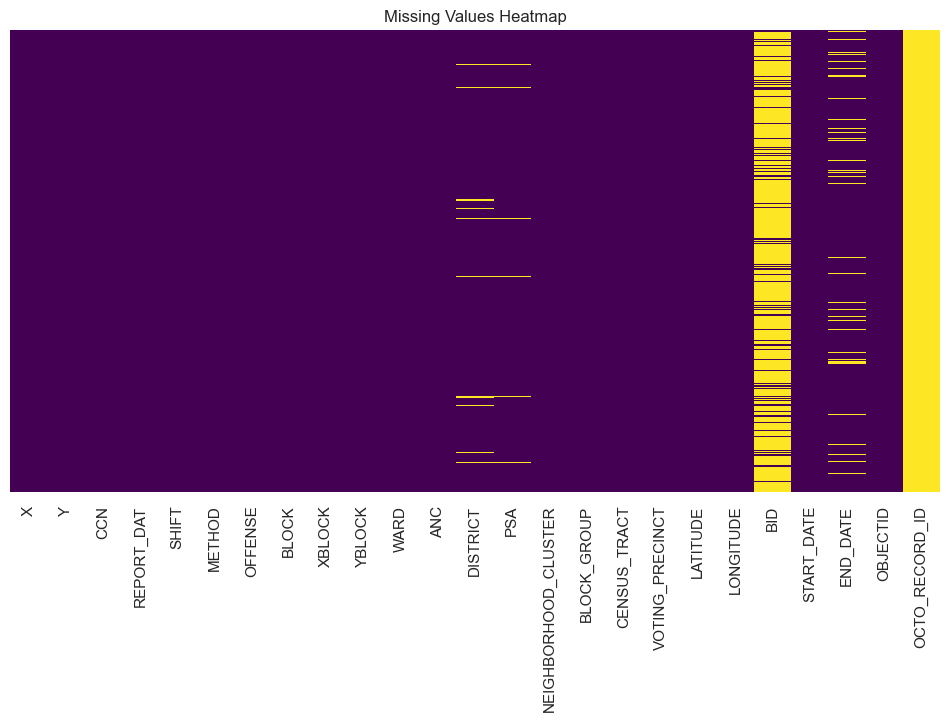

In [526]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

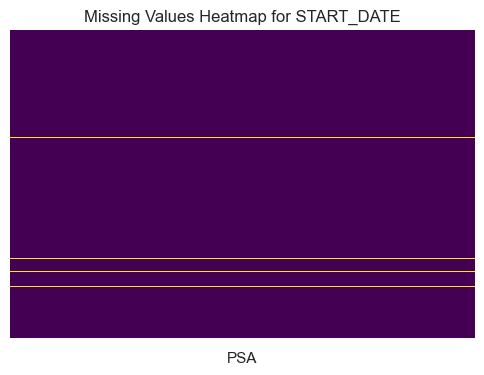

In [527]:
plt.figure(figsize=(6, 4))
sns.heatmap(df[['PSA']].isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap for START_DATE")
plt.show()

In [528]:
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


## Data Cleaning

**Missing Values**

In [529]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

Missing Values:
 WARD                        4
ANC                         4
DISTRICT                  745
PSA                       468
NEIGHBORHOOD_CLUSTER        4
BLOCK_GROUP                15
CENSUS_TRACT               15
VOTING_PRECINCT             4
BID                     23881
START_DATE                  6
END_DATE                 2095
OCTO_RECORD_ID          29295
dtype: int64


In [530]:
df = df.drop(columns=["OCTO_RECORD_ID", "BID","END_DATE","START_DATE",
             "BLOCK_GROUP","CENSUS_TRACT","VOTING_PRECINCT","BLOCK","ANC"])

In [531]:
df["WARD"].fillna(df["WARD"].median(), inplace=True)

C:\Users\Joem Mathews\AppData\Local\Temp\ipykernel_18100\572116229.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["WARD"].fillna(df["WARD"].median(), inplace=True)


In [532]:
df["DISTRICT"].fillna(df["DISTRICT"].mode()[0], inplace=True)

C:\Users\Joem Mathews\AppData\Local\Temp\ipykernel_18100\3031952714.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["DISTRICT"].fillna(df["DISTRICT"].mode()[0], inplace=True)


In [533]:
df["PSA"].fillna(df["PSA"].median(), inplace=True)

C:\Users\Joem Mathews\AppData\Local\Temp\ipykernel_18100\2216328876.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["PSA"].fillna(df["PSA"].median(), inplace=True)


In [534]:
df["NEIGHBORHOOD_CLUSTER"].fillna(df["NEIGHBORHOOD_CLUSTER"].mode()[0], inplace=True)

C:\Users\Joem Mathews\AppData\Local\Temp\ipykernel_18100\1202912427.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["NEIGHBORHOOD_CLUSTER"].fillna(df["NEIGHBORHOOD_CLUSTER"].mode()[0], inplace=True)


In [535]:
df.isna().sum()

X                       0
Y                       0
CCN                     0
REPORT_DAT              0
SHIFT                   0
METHOD                  0
OFFENSE                 0
XBLOCK                  0
YBLOCK                  0
WARD                    0
DISTRICT                0
PSA                     0
NEIGHBORHOOD_CLUSTER    0
LATITUDE                0
LONGITUDE               0
OBJECTID                0
dtype: int64

**Duplicates**

In [536]:
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


**Formatting Data**

In [537]:
df["REPORT_DAT"] = pd.to_datetime(df["REPORT_DAT"], errors='coerce')

In [538]:
df.columns = df.columns.str.lower()

In [539]:
df["offense"] = df["offense"].str.strip()
df["method"] = df["method"].str.strip()
df["shift"] = df["shift"].str.strip()

In [540]:
df["offense"] = df["offense"].str.upper()
df["method"] = df["method"].str.upper()
df["shift"] = df["shift"].str.upper()

In [541]:
df.head()

,x,y,ccn,report_dat,shift,method,offense,xblock,yblock,ward,district,psa,neighborhood_cluster,latitude,longitude,objectid
0,396384.27,137427.7600,24054605,2024-04-12 14:24:15+00:00,DAY,OTHERS,THEFT F/AUTO,396384.270000,137427.760000,2.0,2.0,207.0,Cluster 6,38.904699,-77.041686,666213423
1,395709.91,137490.9400,24056000,2024-04-14 23:56:40+00:00,EVENING,OTHERS,THEFT/OTHER,395709.910000,137490.940000,2.0,2.0,207.0,Cluster 5,38.905265,-77.049461,666213424
2,397497.55,137053.1300,24056385,2024-04-15 17:42:57+00:00,DAY,OTHERS,THEFT/OTHER,397497.550000,137053.130000,2.0,2.0,209.0,Cluster 8,38.901328,-77.028849,666213769
3,400040.61,129046.4721,18060158,2024-07-30 04:00:00+00:00,MIDNIGHT,GUN,HOMICIDE,400040.610046,129046.472149,8.0,7.0,706.0,Cluster 39,38.829204,-76.999532,666236835
4,397171.11,137408.2500,24013789,2024-01-28 07:33:28+00:00,MIDNIGHT,OTHERS,THEFT/OTHER,397171.110000,137408.250000,2.0,2.0,207.0,Cluster 8,38.904526,-77.032614,666239683


**Data Types**

In [542]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29295 entries, 0 to 29294
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   x                     29295 non-null  float64            
 1   y                     29295 non-null  float64            
 2   ccn                   29295 non-null  int64              
 3   report_dat            29295 non-null  datetime64[ns, UTC]
 4   shift                 29295 non-null  object             
 5   method                29295 non-null  object             
 6   offense               29295 non-null  object             
 7   xblock                29295 non-null  float64            
 8   yblock                29295 non-null  float64            
 9   ward                  29295 non-null  float64            
 10  district              29295 non-null  float64            
 11  psa                   29295 non-null  float64            
 12  neig

In [543]:
print("Unique Offenses:", df["offense"].unique())
print("Unique Methods:", df["method"].unique())
print("Unique Shifts:", df["shift"].unique())
print("Unique Neighborhood_Cluster:", df["neighborhood_cluster"].unique())

Unique Offenses: ['THEFT F/AUTO' 'THEFT/OTHER' 'HOMICIDE' 'MOTOR VEHICLE THEFT' 'ROBBERY'
 'ASSAULT W/DANGEROUS WEAPON' 'ARSON' 'BURGLARY' 'SEX ABUSE']
Unique Methods: ['OTHERS' 'GUN' 'KNIFE']
Unique Shifts: ['DAY' 'EVENING' 'MIDNIGHT']
Unique Neighborhood_Cluster: ['Cluster 6' 'Cluster 5' 'Cluster 8' 'Cluster 39' 'Cluster 22'
 'Cluster 11' 'Cluster 2' 'Cluster 16' 'Cluster 25' 'Cluster 34'
 'Cluster 4' 'Cluster 35' 'Cluster 9' 'Cluster 26' 'Cluster 21'
 'Cluster 3' 'Cluster 27' 'Cluster 32' 'Cluster 17' 'Cluster 23'
 'Cluster 33' 'Cluster 31' 'Cluster 1' 'Cluster 12' 'Cluster 18'
 'Cluster 10' 'Cluster 7' 'Cluster 14' 'Cluster 20' 'Cluster 15'
 'Cluster 19' 'Cluster 24' 'Cluster 40' 'Cluster 36' 'Cluster 30'
 'Cluster 28' 'Cluster 13' 'Cluster 43' 'Cluster 38' 'Cluster 45'
 'Cluster 37' 'Cluster 29' 'Cluster 44' 'Cluster 46' 'Cluster 41']


In [544]:
label_encoder = LabelEncoder()
df["shift_new"] = label_encoder.fit_transform(df["shift"])

In [545]:
df = df.drop(columns=["shift"])

In [546]:
label_encoder = LabelEncoder()
df["method_new"] = label_encoder.fit_transform(df["method"])

In [547]:
df = df.drop(columns=["method"])

In [548]:
df['cluster'] = df['neighborhood_cluster'].str.extract('(\d+)')

In [549]:
df['cluster'] = pd.to_numeric(df['cluster'], errors='coerce')

In [550]:
df = df.drop(columns=["neighborhood_cluster"])

In [551]:
df['reported_date'] = df['report_dat'].dt.date

In [552]:
df["reported_date"] = pd.to_datetime(df["reported_date"], errors='coerce')

In [553]:
df = df.drop(columns=["report_dat"])

In [554]:
df['month'] = df['reported_date'].dt.month

In [555]:
df = df.drop(columns=["reported_date"])

In [556]:
offense_mapping = {
    "HOMICIDE": 9,
    "SEX ABUSE": 8,
    "ASSAULT W/DANGEROUS WEAPON": 7,
    "ROBBERY": 6,
    "BURGLARY": 5,
    "THEFT/OTHER": 4,
    "MOTOR VEHICLE THEFT": 3,
    "THEFT F/AUTO": 2,
    "ARSON": 1,
    "OTHER": 0  
}

In [557]:
df["offense_new"] = df["offense"].map(offense_mapping).fillna(0)

In [558]:
df = df.drop(columns=["offense"])

In [559]:
df = df.drop(columns=["longitude", "latitude","x","y","objectid"])

In [560]:
df.head()

,ccn,xblock,yblock,ward,district,psa,shift_new,method_new,cluster,month,offense_new
0,24054605,396384.270000,137427.760000,2.0,2.0,207.0,0,2,6,4,2
1,24056000,395709.910000,137490.940000,2.0,2.0,207.0,1,2,5,4,4
2,24056385,397497.550000,137053.130000,2.0,2.0,209.0,0,2,8,4,4
3,18060158,400040.610046,129046.472149,8.0,7.0,706.0,2,0,39,7,9
4,24013789,397171.110000,137408.250000,2.0,2.0,207.0,2,2,8,1,4


In [561]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29295 entries, 0 to 29294
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ccn          29295 non-null  int64  
 1   xblock       29295 non-null  float64
 2   yblock       29295 non-null  float64
 3   ward         29295 non-null  float64
 4   district     29295 non-null  float64
 5   psa          29295 non-null  float64
 6   shift_new    29295 non-null  int64  
 7   method_new   29295 non-null  int64  
 8   cluster      29295 non-null  int64  
 9   month        29295 non-null  int32  
 10  offense_new  29295 non-null  int64  
dtypes: float64(5), int32(1), int64(5)
memory usage: 2.3 MB


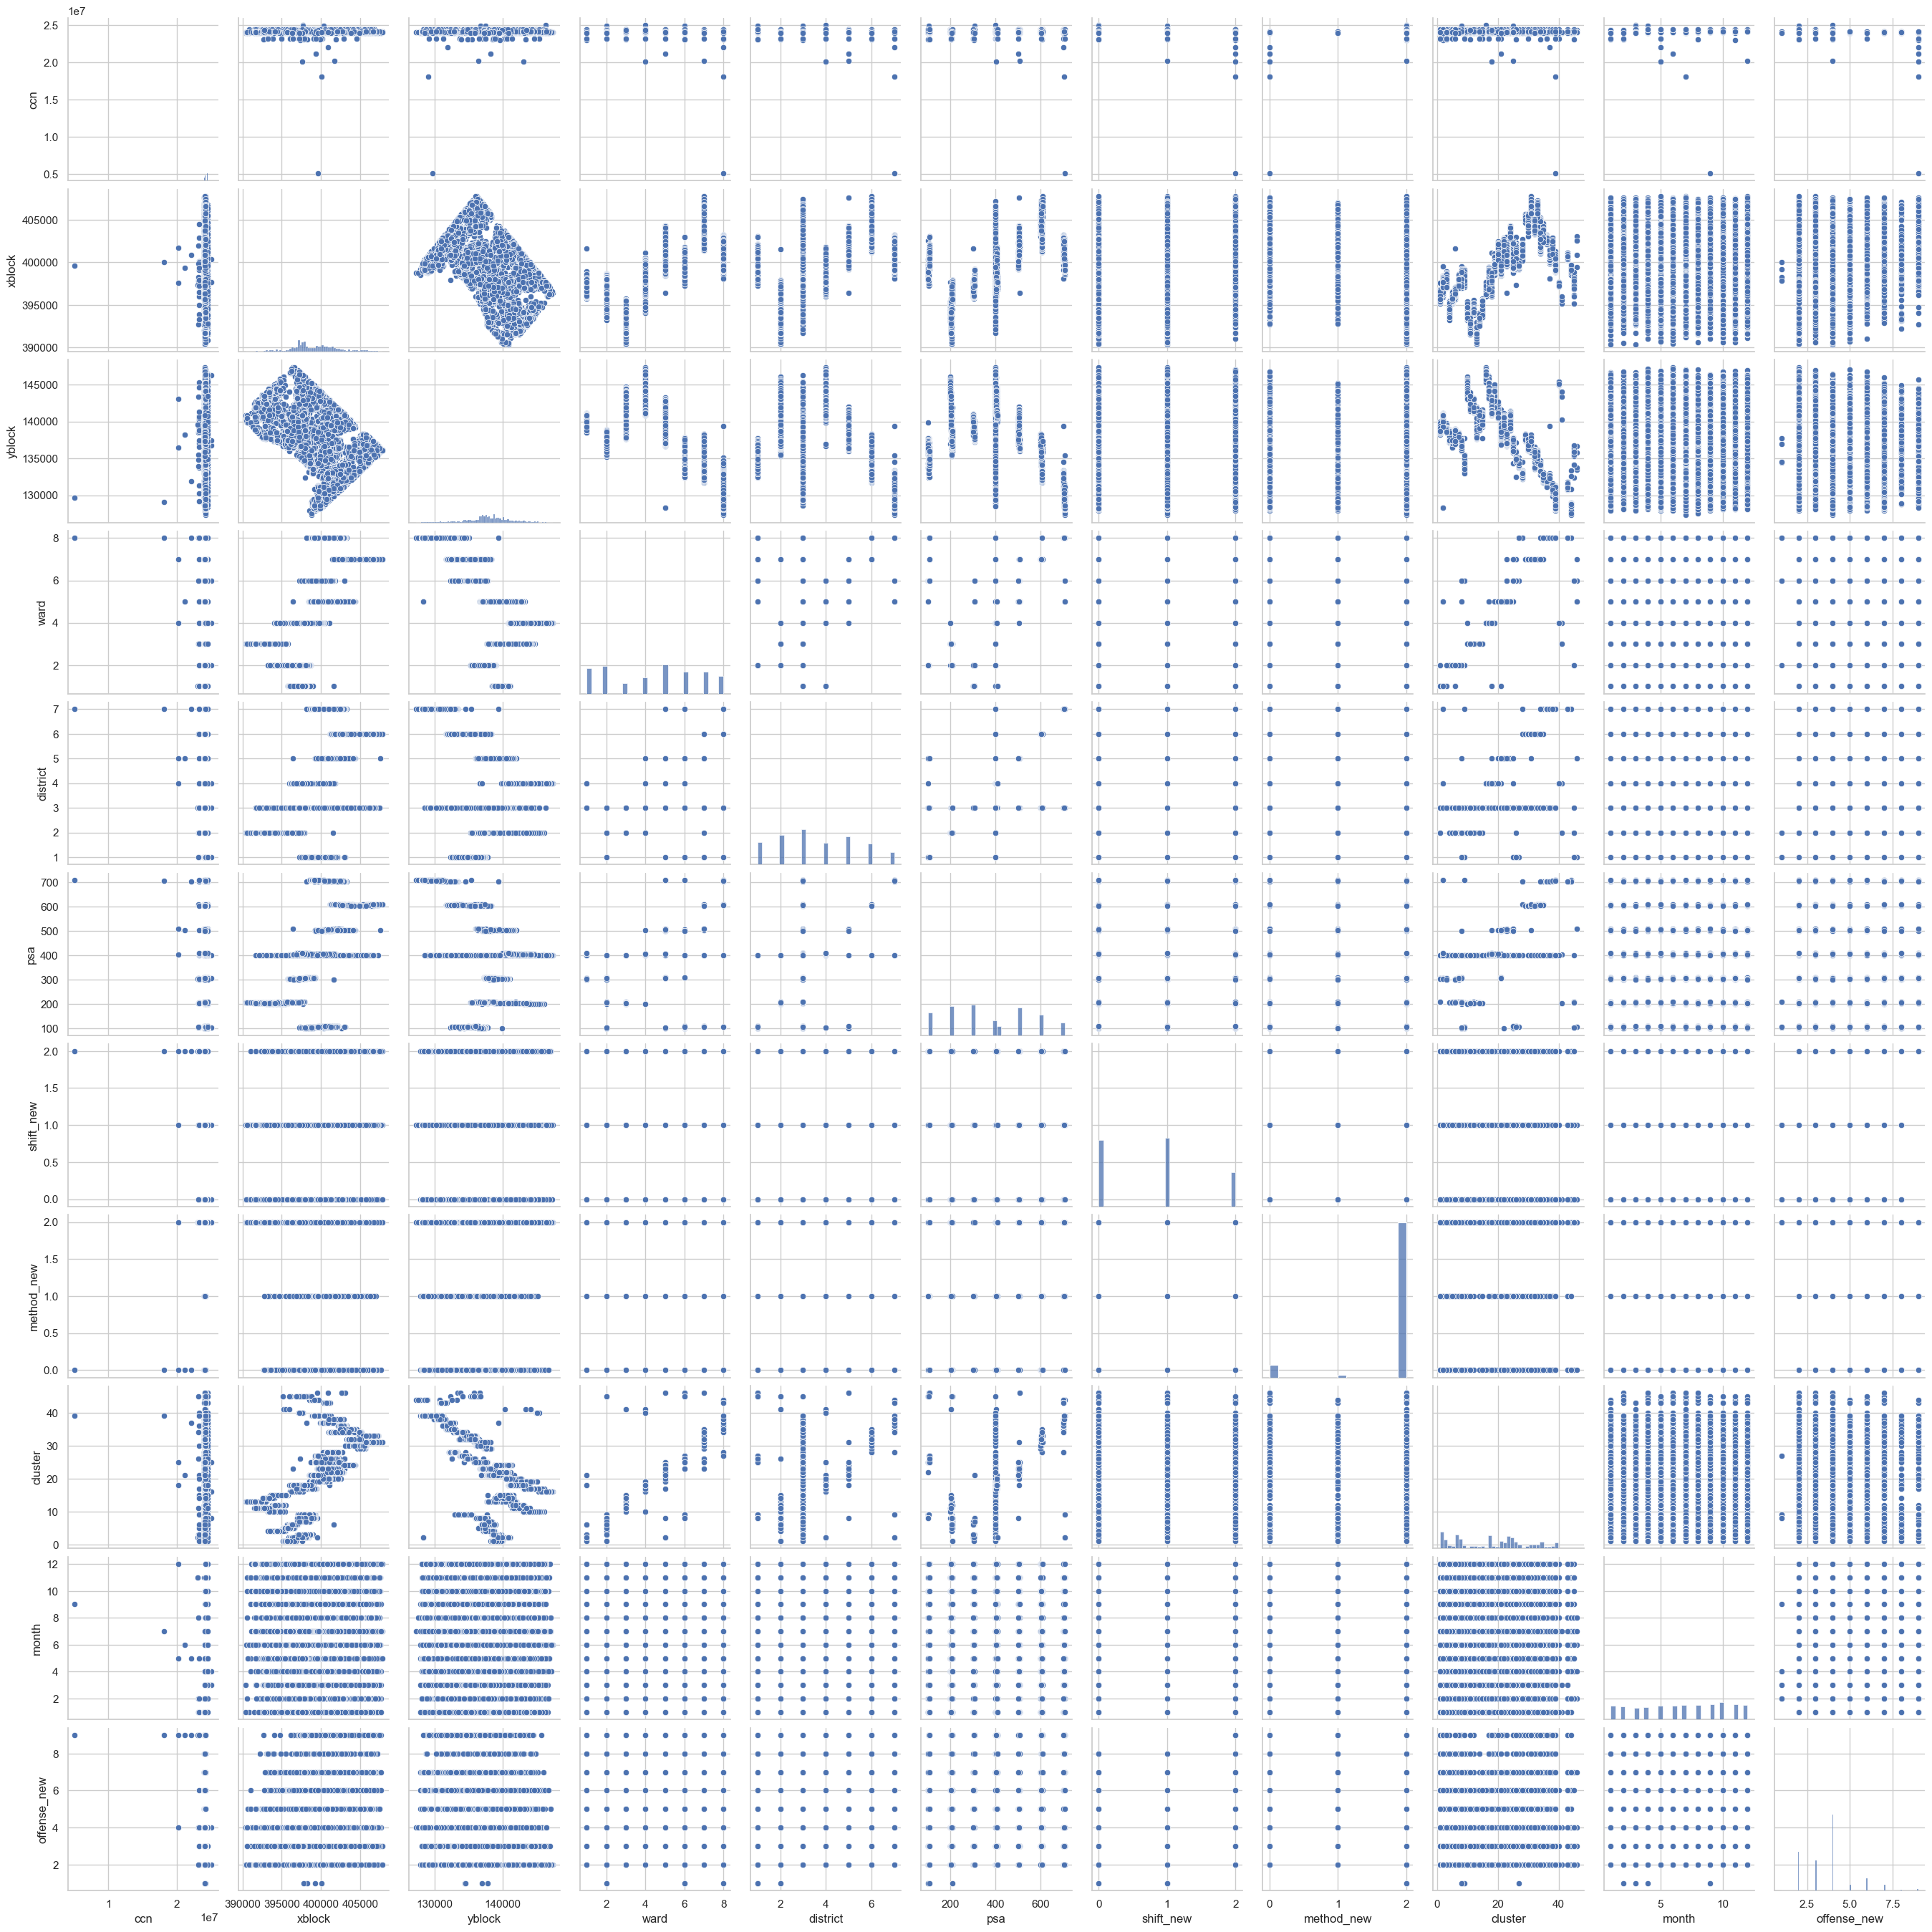

In [562]:
sns.pairplot(df)

<Axes: xlabel='offense_new', ylabel='count'>

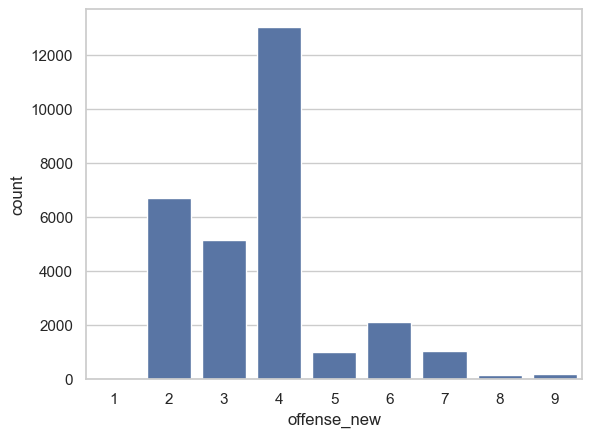

In [563]:
sns.countplot(x='offense_new',data=df)

## Outlier Detection and Removal

In [564]:
df.describe()

,ccn,xblock,yblock,ward,district,psa,shift_new,method_new,cluster,month,offense_new
count,2.929500e+04,29295.000000,29295.000000,29295.000000,29295.000000,29295.000000,29295.000000,29295.000000,29295.000000,29295.000000,29295.000000
mean,2.412673e+07,399281.365190,137801.454601,4.393685,3.685407,375.260864,0.809899,1.837413,18.068032,6.753849,3.703089
std,1.624752e+05,3032.291061,3344.181868,2.322725,1.821774,182.306889,0.747959,0.533464,11.526305,3.434153,1.369072
min,5.094764e+06,390362.150000,127300.240000,1.000000,1.000000,101.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,2.405873e+07,397229.000006,136234.280000,2.000000,2.000000,207.000000,0.000000,2.000000,7.000000,4.000000,3.000000
50%,2.411504e+07,399029.030000,137856.979997,5.000000,3.000000,401.000000,1.000000,2.000000,19.000000,7.000000,4.000000
75%,2.416641e+07,401206.777279,139815.115000,6.000000,5.000000,506.000000,1.000000,2.000000,26.000000,10.000000,4.000000
max,2.503097e+07,407806.750917,147365.030000,8.000000,7.000000,708.000000,2.000000,2.000000,46.000000,12.000000,9.000000


**Using percentile**

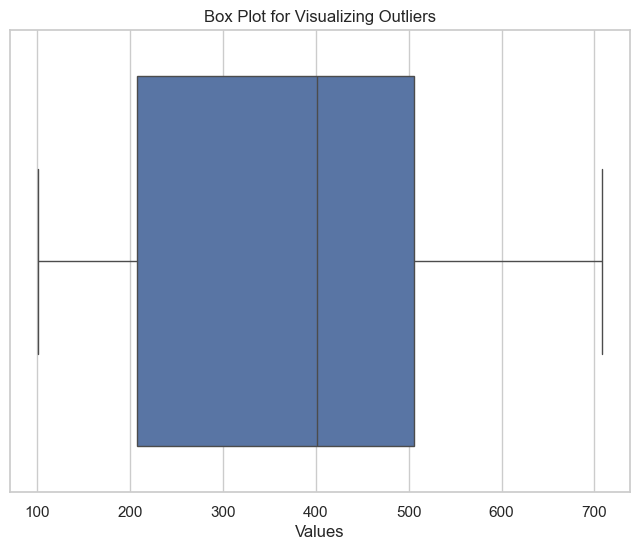

In [565]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['psa'])
plt.title('Box Plot for Visualizing Outliers')
plt.xlabel('Values')
plt.show()

In [566]:
max_thresold = df['psa'].quantile(0.95)
max_thresold

np.float64(703.0)

In [567]:
df[df['psa']>max_thresold]

,ccn,xblock,yblock,ward,district,psa,shift_new,method_new,cluster,month,offense_new
3,18060158,400040.610046,129046.472149,8.0,7.0,706.0,2,0,39,7,9
16,24018256,400287.314110,131139.801047,8.0,7.0,707.0,0,2,39,2,3
33,24026931,399950.600542,129371.378869,8.0,7.0,706.0,0,2,39,2,2
35,24027552,400158.097918,129636.597846,8.0,7.0,706.0,0,0,39,2,6
65,24030965,399213.153949,129213.668821,8.0,7.0,708.0,1,2,39,2,3
...,...,...,...,...,...,...,...,...,...,...,...
29225,24422654,399695.582270,130571.314807,8.0,7.0,707.0,2,2,39,7,4
29272,24162406,400346.000000,131109.050000,8.0,7.0,707.0,1,0,39,10,6
29275,24009025,399117.400000,128601.940000,8.0,7.0,708.0,1,2,39,1,4
29276,24172782,400998.020000,130720.490000,8.0,7.0,705.0,1,2,38,11,3


In [568]:
min_thresold = df['psa'].quantile(0.05)
min_thresold

np.float64(104.0)

In [569]:
df[df['psa']<min_thresold]

,ccn,xblock,yblock,ward,district,psa,shift_new,method_new,cluster,month,offense_new
11,24016287,398413.28,137185.23,6.0,1.0,101.0,1,2,8,2,3
71,24015732,399029.40,136400.85,6.0,1.0,102.0,1,2,8,1,5
80,24018555,398998.67,136737.04,6.0,1.0,102.0,1,2,8,2,4
95,24024430,398010.07,136809.50,2.0,1.0,101.0,1,2,8,2,4
137,24032340,397874.42,134688.20,6.0,1.0,103.0,0,2,9,3,4
...,...,...,...,...,...,...,...,...,...,...,...
29126,24037038,398098.85,136808.92,2.0,1.0,101.0,0,2,8,3,4
29148,24039034,398817.19,136100.85,6.0,1.0,102.0,1,2,8,3,4
29205,24154601,397826.99,135851.06,2.0,1.0,103.0,2,2,45,10,3
29218,24176136,398098.85,136808.92,2.0,1.0,101.0,1,2,8,11,4


In [570]:
df1= df[(df['psa']<max_thresold) & (df['psa']>min_thresold)]
df1

,ccn,xblock,yblock,ward,district,psa,shift_new,method_new,cluster,month,offense_new
0,24054605,396384.27000,137427.760000,2.0,2.0,207.0,0,2,6,4,2
1,24056000,395709.91000,137490.940000,2.0,2.0,207.0,1,2,5,4,4
2,24056385,397497.55000,137053.130000,2.0,2.0,209.0,0,2,8,4,4
4,24013789,397171.11000,137408.250000,2.0,2.0,207.0,2,2,8,1,4
5,24013988,400594.86000,139371.550000,5.0,5.0,505.0,0,2,22,1,3
...,...,...,...,...,...,...,...,...,...,...,...
29290,24042076,400089.04000,137531.630000,6.0,5.0,501.0,2,0,25,3,7
29291,24030573,397228.74000,137931.790000,2.0,3.0,307.0,1,2,7,2,2
29292,24033166,403784.43000,135262.060000,7.0,6.0,603.0,2,2,32,3,3
29293,24033419,396307.96000,137321.650000,2.0,2.0,207.0,0,2,6,3,4


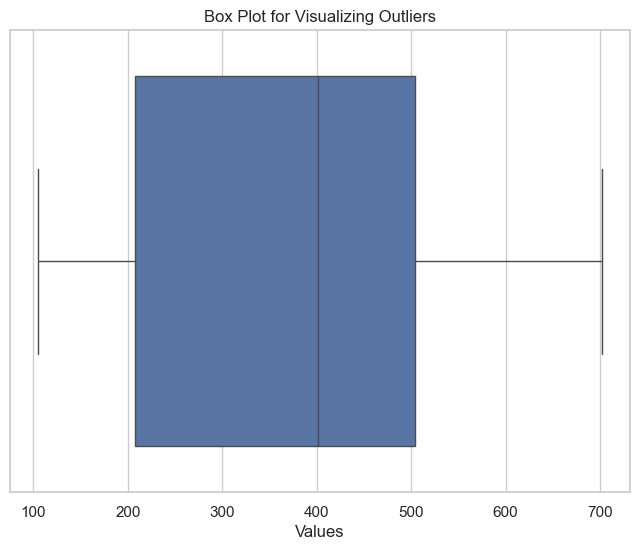

In [571]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df1['psa'])
plt.title('Box Plot for Visualizing Outliers')
plt.xlabel('Values')
plt.show()

In [572]:
df1.shape

(25872, 11)

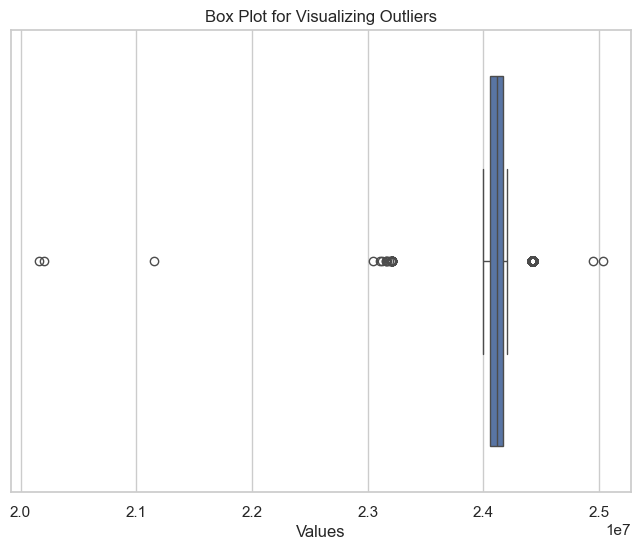

In [573]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df1['ccn'])
plt.title('Box Plot for Visualizing Outliers')
plt.xlabel('Values')
plt.show()

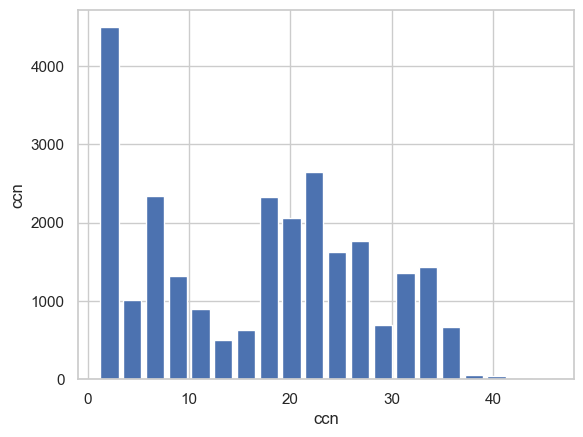

In [574]:
plt.hist(df1.cluster, bins=20, rwidth=0.8)
plt.xlabel('ccn')
plt.ylabel('ccn')
plt.show()

In [575]:
column = 'ccn'
data = df1[column]

<Axes: xlabel='ccn', ylabel='Density'>

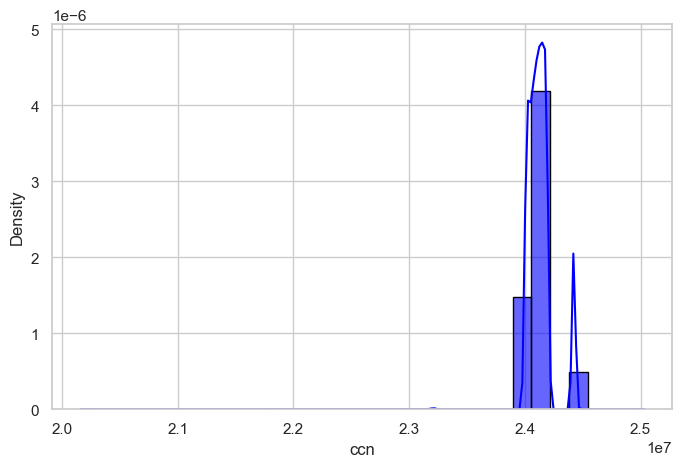

In [576]:
plt.figure(figsize=(8, 5))
sns.histplot(data, bins=30, kde=True, stat='density', color='blue', edgecolor='black', alpha=0.6)

In [577]:
df1.ccn.mean()

np.float64(24128234.094503712)

In [578]:
df1.ccn.std()

np.float64(113826.35733976724)

In [579]:
upper_limit = df1.ccn.mean() + 3*df1.ccn.std()
upper_limit

np.float64(24469713.166523013)

In [580]:
lower_limit = df1.ccn.mean() -3*df1.ccn.std()
lower_limit

np.float64(23786755.02248441)

In [581]:
df1[(df1.ccn>upper_limit) | (df1.ccn<lower_limit)]

,ccn,xblock,yblock,ward,district,psa,shift_new,method_new,cluster,month,offense_new
112,23211736,397631.290000,145320.340000,4.0,4.0,401.0,1,2,40,1,4
3689,23211704,397162.060000,140182.430000,1.0,3.0,302.0,1,2,2,1,4
5166,23198431,396029.230000,137018.530000,2.0,2.0,207.0,0,2,5,1,4
7272,25030974,397694.830000,146283.340000,4.0,4.0,401.0,0,2,16,3,4
8431,23211709,397633.430000,144615.420000,4.0,4.0,402.0,1,2,17,1,2
9061,23211700,399075.688605,133729.559898,6.0,1.0,105.0,1,2,9,1,2
12032,23210943,402886.860000,131330.330000,8.0,7.0,702.0,2,2,36,1,3
12878,23211683,393839.710000,139090.850000,3.0,2.0,204.0,0,2,14,1,4
13740,23184949,394964.330000,140772.690000,3.0,2.0,203.0,1,2,15,1,4
13922,23204363,394964.330000,140772.690000,3.0,2.0,203.0,1,2,15,1,4


In [582]:
df2 = df1[(df1.ccn<upper_limit) & (df1.ccn>lower_limit)]
df2.head()

,ccn,xblock,yblock,ward,district,psa,shift_new,method_new,cluster,month,offense_new
0,24054605,396384.27,137427.76,2.0,2.0,207.0,0,2,6,4,2
1,24056000,395709.91,137490.94,2.0,2.0,207.0,1,2,5,4,4
2,24056385,397497.55,137053.13,2.0,2.0,209.0,0,2,8,4,4
4,24013789,397171.11,137408.25,2.0,2.0,207.0,2,2,8,1,4
5,24013988,400594.86,139371.55,5.0,5.0,505.0,0,2,22,1,3


In [583]:
df2.shape

(25845, 11)

In [584]:
df1.shape

(25872, 11)

**Using Z Score**

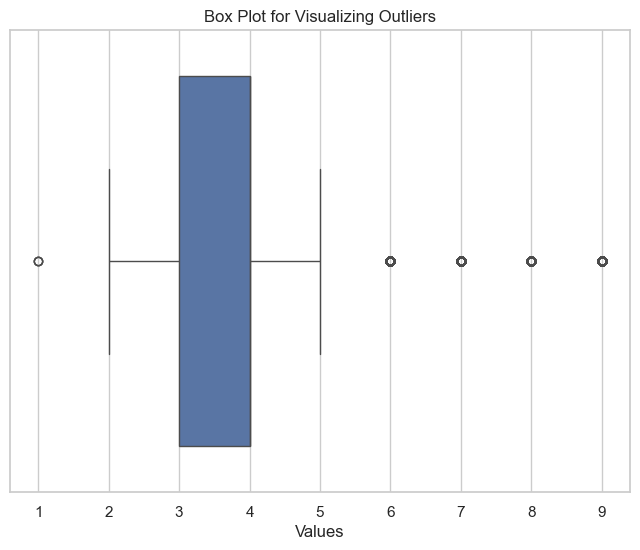

In [585]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df2['offense_new'])
plt.title('Box Plot for Visualizing Outliers')
plt.xlabel('Values')
plt.show()

In [586]:
df2['zscore'] = ( df.offense_new - df.offense_new.mean() ) / df.offense_new.std()
df2.head(5)

C:\Users\Joem Mathews\AppData\Local\Temp\ipykernel_18100\2781006535.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['zscore'] = ( df.offense_new - df.offense_new.mean() ) / df.offense_new.std()


,ccn,xblock,yblock,ward,district,psa,shift_new,method_new,cluster,month,offense_new,zscore
0,24054605,396384.27,137427.76,2.0,2.0,207.0,0,2,6,4,2,-1.243973
1,24056000,395709.91,137490.94,2.0,2.0,207.0,1,2,5,4,4,0.216870
2,24056385,397497.55,137053.13,2.0,2.0,209.0,0,2,8,4,4,0.216870
4,24013789,397171.11,137408.25,2.0,2.0,207.0,2,2,8,1,4,0.216870
5,24013988,400594.86,139371.55,5.0,5.0,505.0,0,2,22,1,3,-0.513552


In [587]:
df2[df2['zscore']>3]

,ccn,xblock,yblock,ward,district,psa,shift_new,method_new,cluster,month,offense_new,zscore
350,24093692,405386.080000,136981.030000,7.0,6.0,602.0,2,0,31,6,9,3.868978
376,24064958,399456.150000,143120.920000,4.0,4.0,406.0,2,2,17,5,8,3.138557
412,24057742,396736.240000,140470.340000,1.0,3.0,302.0,2,2,2,4,8,3.138557
432,24069080,401336.701055,134409.529114,6.0,1.0,106.0,2,2,26,10,9,3.868978
475,24028158,401728.260000,138813.540000,5.0,5.0,506.0,2,2,23,2,9,3.868978
...,...,...,...,...,...,...,...,...,...,...,...,...
28785,24053838,402240.600000,137433.650000,5.0,5.0,507.0,2,0,23,4,9,3.868978
29034,24133037,406392.367204,136190.536156,7.0,6.0,608.0,0,2,31,8,8,3.138557
29046,24066669,402411.784736,131808.620024,8.0,7.0,702.0,2,0,36,5,9,3.868978
29055,24166091,397840.050000,141080.280000,4.0,4.0,404.0,2,0,18,10,9,3.868978


In [588]:
df2[df2['zscore']<-3]

,ccn,xblock,yblock,ward,district,psa,shift_new,method_new,cluster,month,offense_new,zscore


In [589]:
df2[(df2.zscore<-3) | (df2.zscore>3)]

,ccn,xblock,yblock,ward,district,psa,shift_new,method_new,cluster,month,offense_new,zscore
350,24093692,405386.080000,136981.030000,7.0,6.0,602.0,2,0,31,6,9,3.868978
376,24064958,399456.150000,143120.920000,4.0,4.0,406.0,2,2,17,5,8,3.138557
412,24057742,396736.240000,140470.340000,1.0,3.0,302.0,2,2,2,4,8,3.138557
432,24069080,401336.701055,134409.529114,6.0,1.0,106.0,2,2,26,10,9,3.868978
475,24028158,401728.260000,138813.540000,5.0,5.0,506.0,2,2,23,2,9,3.868978
...,...,...,...,...,...,...,...,...,...,...,...,...
28785,24053838,402240.600000,137433.650000,5.0,5.0,507.0,2,0,23,4,9,3.868978
29034,24133037,406392.367204,136190.536156,7.0,6.0,608.0,0,2,31,8,8,3.138557
29046,24066669,402411.784736,131808.620024,8.0,7.0,702.0,2,0,36,5,9,3.868978
29055,24166091,397840.050000,141080.280000,4.0,4.0,404.0,2,0,18,10,9,3.868978


In [590]:
df3= df2[(df2.zscore>-3) & (df2.zscore<3)]
df3.head()

,ccn,xblock,yblock,ward,district,psa,shift_new,method_new,cluster,month,offense_new,zscore
0,24054605,396384.27,137427.76,2.0,2.0,207.0,0,2,6,4,2,-1.243973
1,24056000,395709.91,137490.94,2.0,2.0,207.0,1,2,5,4,4,0.216870
2,24056385,397497.55,137053.13,2.0,2.0,209.0,0,2,8,4,4,0.216870
4,24013789,397171.11,137408.25,2.0,2.0,207.0,2,2,8,1,4,0.216870
5,24013988,400594.86,139371.55,5.0,5.0,505.0,0,2,22,1,3,-0.513552


In [591]:
df3.shape

(25591, 12)

In [592]:
df2.shape

(25845, 12)

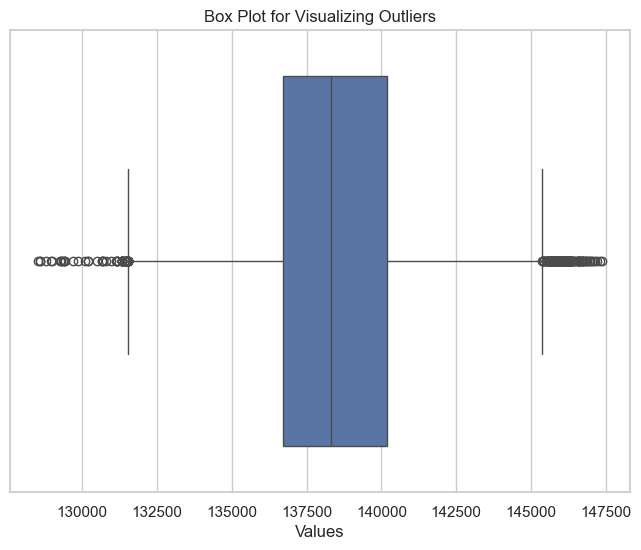

In [593]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df3['yblock'])
plt.title('Box Plot for Visualizing Outliers')
plt.xlabel('Values')
plt.show()

In [594]:
max_thresold = df3['yblock'].quantile(0.95)
max_thresold

np.float64(143584.06)

In [595]:
df3[df3['yblock']>max_thresold]

,ccn,xblock,yblock,ward,district,psa,shift_new,method_new,cluster,month,offense_new,zscore
8,24014498,397370.40,146617.14,4.0,4.0,401.0,1,2,16,1,2,-1.243973
26,24024063,397603.37,144181.51,4.0,4.0,402.0,1,2,17,2,4,0.216870
32,24026662,398817.42,144181.29,4.0,4.0,406.0,1,2,17,2,4,0.216870
51,24008398,397694.83,146283.34,4.0,4.0,401.0,1,2,16,1,4,0.216870
67,24033653,397577.63,143785.94,4.0,4.0,402.0,1,2,17,3,4,0.216870
...,...,...,...,...,...,...,...,...,...,...,...,...
29161,24131848,397267.44,144668.19,4.0,4.0,402.0,0,2,17,8,2,-1.243973
29167,24148304,393427.72,143911.66,3.0,2.0,201.0,0,2,10,9,2,-1.243973
29174,24051928,399826.91,144154.90,4.0,4.0,406.0,1,2,19,4,3,-0.513552
29201,24185606,397678.76,144246.86,4.0,4.0,402.0,0,2,17,11,3,-0.513552


In [596]:
min_thresold = df3['yblock'].quantile(0.05)
min_thresold

np.float64(133455.812729278)

In [597]:
df3[df3['yblock']<min_thresold]

,ccn,xblock,yblock,ward,district,psa,shift_new,method_new,cluster,month,offense_new,zscore
10,24016105,401542.869279,133412.924537,8.0,6.0,607.0,0,2,34,2,2,-1.243973
13,24016651,402817.800000,132471.610000,7.0,6.0,606.0,0,2,35,2,4,0.216870
25,24022386,402904.744449,132166.506200,7.0,6.0,606.0,1,2,35,2,3,-0.513552
127,24041417,402411.784736,131808.620024,8.0,7.0,702.0,2,0,36,3,7,2.408135
141,24034333,402548.020000,133051.220000,7.0,6.0,606.0,2,2,35,3,2,-1.243973
...,...,...,...,...,...,...,...,...,...,...,...,...
29116,24018772,402817.800000,132471.610000,7.0,6.0,606.0,0,2,35,2,4,0.216870
29158,24129267,400779.481215,132981.499417,8.0,7.0,701.0,1,2,28,8,3,-0.513552
29166,24196711,402808.880000,132407.500000,7.0,6.0,606.0,0,0,35,12,6,1.677713
29183,24183032,400779.481215,132981.499417,8.0,7.0,701.0,2,2,28,11,3,-0.513552


In [598]:
df4= df3[(df3['yblock']<max_thresold) & (df3['yblock']>min_thresold)]
df4

,ccn,xblock,yblock,ward,district,psa,shift_new,method_new,cluster,month,offense_new,zscore
0,24054605,396384.27000,137427.760000,2.0,2.0,207.0,0,2,6,4,2,-1.243973
1,24056000,395709.91000,137490.940000,2.0,2.0,207.0,1,2,5,4,4,0.216870
2,24056385,397497.55000,137053.130000,2.0,2.0,209.0,0,2,8,4,4,0.216870
4,24013789,397171.11000,137408.250000,2.0,2.0,207.0,2,2,8,1,4,0.216870
5,24013988,400594.86000,139371.550000,5.0,5.0,505.0,0,2,22,1,3,-0.513552
...,...,...,...,...,...,...,...,...,...,...,...,...
29290,24042076,400089.04000,137531.630000,6.0,5.0,501.0,2,0,25,3,7,2.408135
29291,24030573,397228.74000,137931.790000,2.0,3.0,307.0,1,2,7,2,2,-1.243973
29292,24033166,403784.43000,135262.060000,7.0,6.0,603.0,2,2,32,3,3,-0.513552
29293,24033419,396307.96000,137321.650000,2.0,2.0,207.0,0,2,6,3,4,0.216870


In [599]:
df4.shape

(22999, 12)

In [600]:
df3.shape

(25591, 12)

In [601]:
df4.describe()

,ccn,xblock,yblock,ward,district,psa,shift_new,method_new,cluster,month,offense_new,zscore
count,2.299900e+04,22999.000000,22999.000000,22999.000000,22999.000000,22999.000000,22999.000000,22999.000000,22999.000000,22999.000000,22999.000000,22999.000000
mean,2.413188e+07,399097.281152,138370.285670,3.889821,3.492848,356.228488,0.795730,1.864516,15.867429,6.795904,3.615505,-0.063973
std,1.052621e+05,3204.700899,2239.364132,2.184335,1.541813,153.939015,0.742014,0.490355,10.462442,3.437249,1.236474,0.903147
min,2.400000e+07,390362.150000,133458.820000,1.000000,1.000000,105.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-1.974395
25%,2.406042e+07,397115.780000,136987.940000,2.000000,2.000000,208.000000,0.000000,2.000000,6.000000,4.000000,3.000000,-0.513552
50%,2.411633e+07,398316.220000,138305.160000,4.000000,3.000000,307.000000,1.000000,2.000000,18.000000,7.000000,4.000000,0.216870
75%,2.416888e+07,401135.869855,139902.815000,6.000000,5.000000,503.000000,1.000000,2.000000,25.000000,10.000000,4.000000,0.216870
max,2.442555e+07,407806.750917,143583.810000,8.000000,6.000000,608.000000,2.000000,2.000000,46.000000,12.000000,7.000000,2.408135


**using IQR**

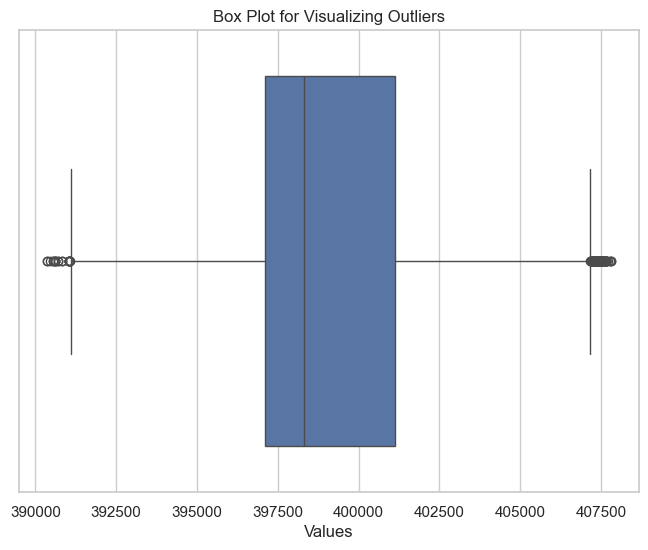

In [602]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df4['xblock'])
plt.title('Box Plot for Visualizing Outliers')
plt.xlabel('Values')
plt.show()

In [669]:
Q1 = df4.xblock.quantile(0.25)
Q3 = df4.xblock.quantile(0.75)
Q1, Q3

(np.float64(397115.78), np.float64(401135.869855007))

In [670]:
IQR = Q3 - Q1
IQR

np.float64(4020.089855006954)

In [671]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(np.float64(391085.64521748957), np.float64(407166.0046375174))

In [672]:
df4[(df4.xblock<lower_limit)|(df4.xblock>upper_limit)]

,ccn,xblock,yblock,ward,district,psa,shift_new,method_new,cluster,month,offense_new,zscore
113,24035420,407609.013477,136201.125628,7.0,6.0,608.0,2,2,31,3,4,0.216870
158,24040788,407430.500645,136443.617244,7.0,6.0,608.0,2,2,31,3,5,0.947292
205,24026967,407251.566085,136517.930364,7.0,6.0,608.0,0,2,31,2,2,-1.243973
493,24079533,407414.900000,136563.010000,7.0,6.0,608.0,2,2,31,5,4,0.216870
495,24080004,391066.120000,139692.590000,3.0,2.0,205.0,1,2,13,5,2,-1.243973
...,...,...,...,...,...,...,...,...,...,...,...,...
26003,24169823,407430.019877,136119.688284,7.0,6.0,608.0,0,2,31,11,2,-1.243973
26485,24051873,407304.930000,136672.940000,7.0,6.0,608.0,0,2,31,4,4,0.216870
26818,24022888,407251.721477,136207.808284,7.0,6.0,608.0,1,2,31,2,2,-1.243973
27757,24073950,407806.750917,136062.564924,7.0,6.0,608.0,0,2,31,5,2,-1.243973


In [673]:
df5 = df4[(df4.xblock>lower_limit)&(df4.xblock<upper_limit)]
df5.head()

,ccn,xblock,yblock,ward,district,psa,shift_new,method_new,cluster,month,offense_new,zscore
0,24054605,396384.27,137427.76,2.0,2.0,207.0,0,2,6,4,2,-1.243973
1,24056000,395709.91,137490.94,2.0,2.0,207.0,1,2,5,4,4,0.216870
2,24056385,397497.55,137053.13,2.0,2.0,209.0,0,2,8,4,4,0.216870
4,24013789,397171.11,137408.25,2.0,2.0,207.0,2,2,8,1,4,0.216870
5,24013988,400594.86,139371.55,5.0,5.0,505.0,0,2,22,1,3,-0.513552


In [674]:
df5 = df5.drop(columns=["zscore"])

In [675]:
df5.shape

(22887, 11)

In [676]:
df4.shape

(22999, 12)

In [677]:
df.shape

(29295, 11)

**Other Outliers removal**

In [678]:
Q1 = df5.method_new.quantile(0.25)
Q3 = df5.method_new.quantile(0.75)
Q1, Q3

(np.float64(2.0), np.float64(2.0))

In [679]:
IQR = Q3 - Q1
IQR

np.float64(0.0)

In [680]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(np.float64(2.0), np.float64(2.0))

In [681]:
df5[(df5.method_new<lower_limit)|(df5.method_new>upper_limit)]

,ccn,xblock,yblock,ward,district,psa,shift_new,method_new,cluster,month,offense_new
7,24014431,397068.32000,140306.490000,1.0,3.0,302.0,0,1,2,1,6
61,24014271,397310.00000,143264.330000,4.0,4.0,403.0,2,0,18,1,6
76,24017496,398144.66000,138469.200000,2.0,3.0,308.0,1,0,7,2,6
109,24031081,405967.07000,137071.710000,7.0,6.0,608.0,1,1,31,2,6
126,24040831,399214.79000,137753.750000,5.0,3.0,308.0,2,1,21,3,6
...,...,...,...,...,...,...,...,...,...,...,...
29235,24178986,401178.57000,135602.000000,6.0,1.0,107.0,1,0,26,11,6
29252,24171260,397847.57000,141258.660000,4.0,4.0,404.0,1,0,18,11,7
29257,24195948,406626.96458,137351.931485,7.0,6.0,608.0,2,0,31,12,7
29285,24012290,399627.24000,138633.070000,5.0,5.0,502.0,1,1,21,1,6


In [682]:
df6 = df5.drop(df5[(df5["method_new"] < lower_limit) | (df5["method_new"] > upper_limit)].index)

In [683]:
df6.shape

(21206, 11)

In [684]:
df5.shape

(22887, 11)

In [694]:
Q1 = df6.ccn.quantile(0.25)
Q3 = df6.ccn.quantile(0.75)
Q1, Q3

(np.float64(24060837.5), np.float64(24170756.0))

In [695]:
IQR = Q3 - Q1
IQR

np.float64(109918.5)

In [696]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(np.float64(23895959.75), np.float64(24335633.75))

In [697]:
df6[(df6.ccn<lower_limit)|(df6.ccn>upper_limit)]

,ccn,xblock,yblock,ward,district,psa,shift_new,method_new,cluster,month,offense_new
2154,24422699,401727.640000,139196.610000,5.0,5.0,505.0,2,2,22,7,2
2155,24422725,397628.830000,140648.850000,1.0,4.0,408.0,0,2,2,8,4
2156,24422785,395459.120000,137490.270000,2.0,2.0,207.0,1,2,5,8,4
2164,24423285,398728.300000,139835.900000,5.0,4.0,405.0,0,2,21,10,4
2165,24423655,397430.660000,136664.370000,2.0,2.0,209.0,0,2,8,10,4
...,...,...,...,...,...,...,...,...,...,...,...
29267,24420784,397868.680000,141140.380000,4.0,4.0,407.0,0,2,18,2,4
29268,24421148,396544.240000,138793.640000,1.0,3.0,301.0,0,2,6,4,4
29269,24421882,397585.500000,140742.970000,1.0,4.0,408.0,1,2,2,5,2
29270,24422085,401092.190000,136018.580000,6.0,1.0,108.0,2,2,25,6,4


In [698]:
df7 = df6.drop(df6[(df6["ccn"] < lower_limit) | (df6["ccn"] > upper_limit)].index)

In [699]:
df7.shape

(19236, 11)

In [700]:
df6.shape

(21206, 11)

In [702]:
Q1 = df7.xblock.quantile(0.25)
Q3 = df7.xblock.quantile(0.75)
Q1, Q3

(np.float64(397115.78), np.float64(401039.66))

In [703]:
IQR = Q3 - Q1
IQR

np.float64(3923.8799999999464)

In [704]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(np.float64(391229.9600000001), np.float64(406925.47999999986))

In [705]:
df7[(df7.xblock<lower_limit)|(df7.xblock>upper_limit)]

,ccn,xblock,yblock,ward,district,psa,shift_new,method_new,cluster,month,offense_new
53,24010548,407132.454949,136517.790044,7.0,6.0,608.0,0,2,31,1,3
536,24046260,407092.210000,135771.760000,7.0,6.0,604.0,1,2,33,3,3
623,24027422,407074.130437,136309.439324,7.0,6.0,608.0,0,2,31,2,2
787,24026358,407074.130437,136309.439324,7.0,6.0,608.0,0,2,31,2,4
982,24116064,391145.540000,139755.490000,3.0,2.0,205.0,0,2,13,7,4
...,...,...,...,...,...,...,...,...,...,...,...
26332,24071711,407068.570000,136156.160000,7.0,6.0,608.0,0,2,31,5,3
26372,24078141,407132.600000,136008.500000,7.0,6.0,608.0,0,2,31,5,2
27213,24089921,406936.280000,135770.600000,7.0,6.0,608.0,0,2,33,6,2
27731,24088903,407165.940000,135422.570000,7.0,6.0,604.0,1,2,33,6,2


In [716]:
df8= df7.drop(df7[(df7["xblock"] < lower_limit) | (df7["xblock"] > upper_limit)].index)

In [718]:
df8.shape

(19164, 11)

In [710]:
df7.shape

(19236, 11)

In [720]:
max_thresold = df8['ccn'].quantile(0.95)
max_thresold

np.float64(24192428.35)

In [721]:
df8[df8['ccn']>max_thresold]

,ccn,xblock,yblock,ward,district,psa,shift_new,method_new,cluster,month,offense_new
1574,24192536,397965.720000,137709.000000,2.0,3.0,307.0,1,2,7,12,4
1576,24193525,398010.080000,138818.940000,1.0,3.0,305.0,1,2,3,12,4
1627,24193791,398186.630000,137367.900000,2.0,3.0,308.0,2,2,8,12,2
1628,24193811,401211.600000,138483.240000,5.0,5.0,506.0,2,2,23,12,2
1629,24193938,405649.446883,135917.880956,7.0,6.0,608.0,0,2,33,12,3
...,...,...,...,...,...,...,...,...,...,...,...
28938,24200704,399765.600000,137802.800000,5.0,5.0,501.0,1,2,23,12,4
29200,24197563,400246.540000,139229.040000,5.0,5.0,502.0,1,2,21,12,2
29255,24192917,394067.600000,142978.840000,3.0,2.0,203.0,1,2,12,12,2
29256,24194007,400777.100000,140572.140000,5.0,5.0,504.0,0,2,22,12,5


In [722]:
min_thresold = df8['ccn'].quantile(0.05)
min_thresold

np.float64(24009934.6)

In [723]:
df8[df8['ccn']<min_thresold]

,ccn,xblock,yblock,ward,district,psa,shift_new,method_new,cluster,month,offense_new
41,24005463,397873.240000,138932.090000,1.0,3.0,305.0,1,2,3,1,4
42,24005538,402062.700000,137062.990000,5.0,5.0,507.0,1,2,23,1,4
43,24005580,399592.184382,134459.518842,6.0,1.0,106.0,1,2,27,1,2
44,24006348,397330.140000,138916.410000,1.0,3.0,305.0,2,2,3,1,2
45,24006823,399080.480000,138468.430000,5.0,3.0,308.0,2,2,21,1,2
...,...,...,...,...,...,...,...,...,...,...,...
28782,24004208,399742.860000,143428.320000,4.0,4.0,406.0,0,2,19,1,3
28783,24004517,398965.480000,133529.410000,6.0,1.0,105.0,1,2,9,1,2
29133,24000984,400600.000000,139626.190000,5.0,5.0,504.0,1,2,22,1,3
29134,24002017,400075.950000,140453.920000,5.0,4.0,405.0,1,2,20,1,2


In [725]:
data= df8[(df8['ccn']<max_thresold) & (df8['ccn']>min_thresold)]

In [736]:
data.head()

,ccn,xblock,yblock,ward,district,psa,shift_new,method_new,cluster,month,offense_new
0,24054605,396384.27,137427.76,2.0,2.0,207.0,0,2,6,4,2
1,24056000,395709.91,137490.94,2.0,2.0,207.0,1,2,5,4,4
2,24056385,397497.55,137053.13,2.0,2.0,209.0,0,2,8,4,4
4,24013789,397171.11,137408.25,2.0,2.0,207.0,2,2,8,1,4
5,24013988,400594.86,139371.55,5.0,5.0,505.0,0,2,22,1,3


In [738]:
data = data.drop(columns=["method_new"])

In [739]:
data.shape

(17246, 10)

In [740]:
df8.shape

(19164, 11)

In [741]:
df.shape

(29295, 11)

## Exploratory Data Analysis

In [742]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ccn,17246.0,2.410533e+07,52926.243709,24009938.00,24060740.00,2.410876e+07,24151171.25,24192419.00
xblock,17246.0,3.989907e+05,3125.846894,391302.68,397115.78,3.981543e+05,400995.89,406920.21
yblock,17246.0,1.384378e+05,2247.466444,133458.82,137047.02,1.384101e+05,140033.11,143583.81
ward,17246.0,3.844254e+00,2.162192,1.00,2.00,4.000000e+00,5.00,8.00
district,17246.0,3.469732e+00,1.520588,1.00,2.00,3.000000e+00,5.00,6.00
psa,17246.0,3.541455e+02,151.966070,105.00,208.00,3.070000e+02,503.00,608.00
shift_new,17246.0,7.680042e-01,0.729719,0.00,0.00,1.000000e+00,1.00,2.00
cluster,17246.0,1.567152e+01,10.345283,1.00,6.00,1.800000e+01,24.00,46.00
month,17246.0,6.794677e+00,3.111646,1.00,4.00,7.000000e+00,9.00,12.00
offense_new,17246.0,3.389945e+00,1.046903,1.00,2.00,4.000000e+00,4.00,7.00


In [743]:
data.corr()

,ccn,xblock,yblock,ward,district,psa,shift_new,cluster,month,offense_new
ccn,1.000000,-0.035525,0.010857,-0.020170,-0.027171,-0.024282,-0.005453,-0.021360,0.995404,0.005302
xblock,-0.035525,1.000000,-0.464451,0.756009,0.694180,0.699438,-0.013935,0.779569,-0.032748,-0.101495
yblock,0.010857,-0.464451,1.000000,-0.468871,0.026737,0.023883,0.009924,-0.400722,0.010078,-0.017099
ward,-0.020170,0.756009,-0.468871,1.000000,0.445776,0.447508,-0.062484,0.963686,-0.017001,-0.118957
district,-0.027171,0.694180,0.026737,0.445776,1.000000,0.988964,0.001484,0.526693,-0.024360,-0.076858
psa,-0.024282,0.699438,0.023883,0.447508,0.988964,1.000000,0.001657,0.528613,-0.021172,-0.075239
shift_new,-0.005453,-0.013935,0.009924,-0.062484,0.001484,0.001657,1.000000,-0.061729,-0.006040,0.081839
cluster,-0.021360,0.779569,-0.400722,0.963686,0.526693,0.528613,-0.061729,1.000000,-0.018072,-0.125538
month,0.995404,-0.032748,0.010078,-0.017001,-0.024360,-0.021172,-0.006040,-0.018072,1.000000,0.005710
offense_new,0.005302,-0.101495,-0.017099,-0.118957,-0.076858,-0.075239,0.081839,-0.125538,0.005710,1.000000


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0, 0.5, 'ccn'),
  Text(0, 1.5, 'xblock'),
  Text(0, 2.5, 'yblock'),
  Text(0, 3.5, 'ward'),
  Text(0, 4.5, 'district'),
  Text(0, 5.5, 'psa'),
  Text(0, 6.5, 'shift_new'),
  Text(0, 7.5, 'cluster'),
  Text(0, 8.5, 'month'),
  Text(0, 9.5, 'offense_new')])

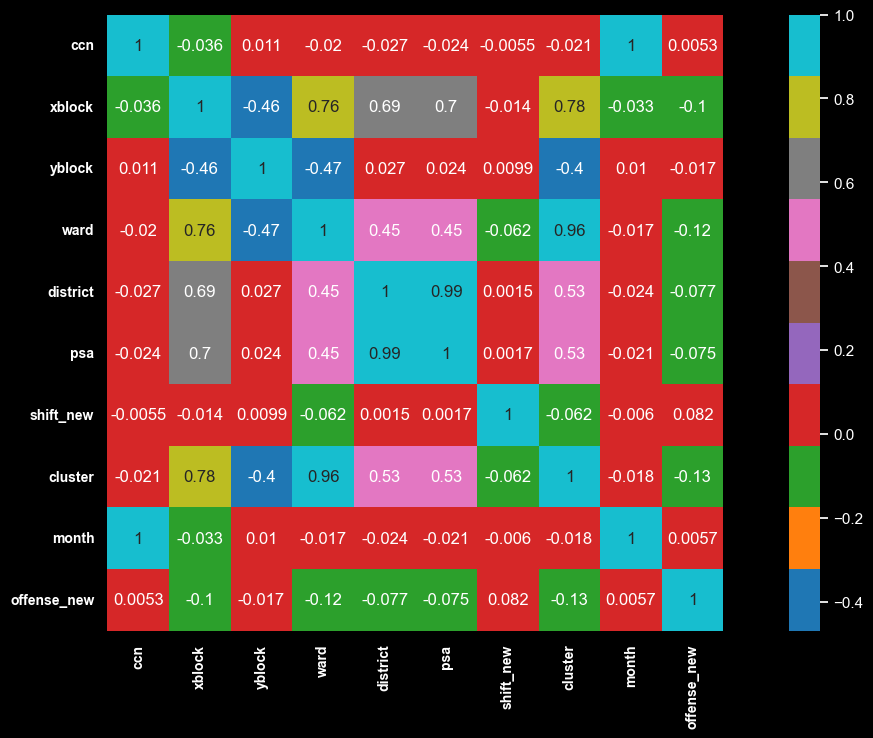

In [744]:
plt.style.use('dark_background')
plt.figure(figsize=(17,8))
sns.heatmap(data.corr(),annot=True,square=True,cmap='tab10')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold')

**Countplot using seaborn showing the counts of offenses by district, with the color hue defined by method**

<Axes: xlabel='district', ylabel='count'>

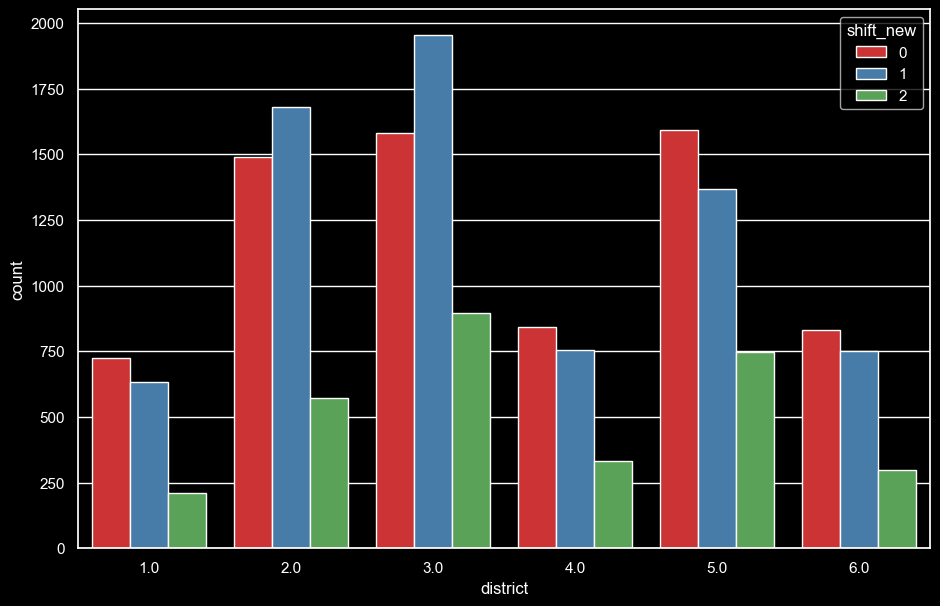

In [747]:
plt.figure(figsize=(11,7))
sns.countplot(x='district',hue='shift_new',data=data,palette='Set1')

**Trend between shift and Object**

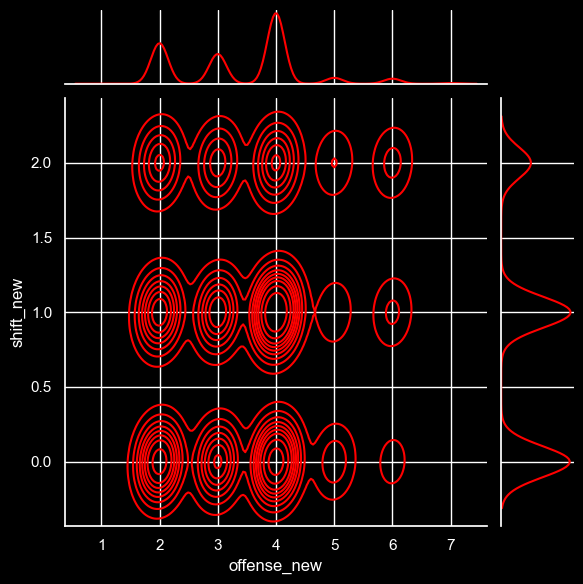

In [749]:
sns.jointplot(x='offense_new',y='shift_new',data=data,color='red',kind='kde')

**3D Surface plot**

In [752]:
offense_unique = np.unique(data['offense_new'])
month_unique = np.unique(data['month'])
X, Y = np.meshgrid(offense_unique, month_unique)
Z = np.zeros_like(X, dtype=float)
for i in range(len(data)):
    x_idx = np.where(offense_unique == data['offense_new'].iloc[i])[0][0]
    y_idx = np.where(month_unique == df['month'].iloc[i])[0][0]
    Z[y_idx, x_idx] = data['shift_new'].iloc[i]

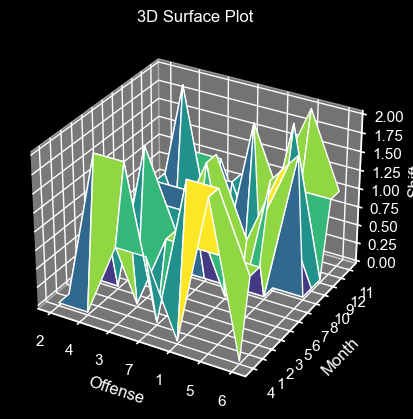

In [753]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('Offense')
ax.set_ylabel('Month')
ax.set_zlabel('Shift')
ax.set_xticks(offense_unique)
ax.set_xticklabels(data['offense_new'].unique())
ax.set_yticks(month_unique)
ax.set_yticklabels(data['month'].unique())
ax.set_title('3D Surface Plot')
plt.show()

In [754]:
data.offense_new.value_counts()

offense_new
4    7994
2    4584
3    3362
5     661
6     569
7      73
1       3
Name: count, dtype: int64

**Pie chart for Offenses**

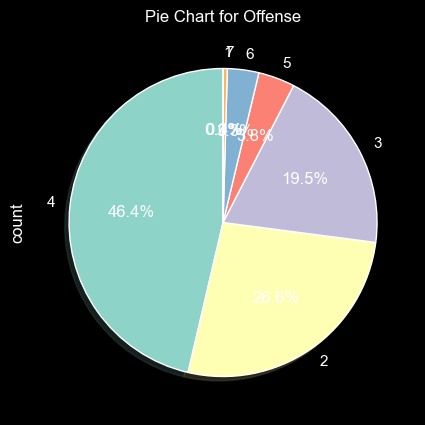

In [755]:
data["offense_new"].value_counts().plot.pie(autopct='%1.1f%%', startangle=90,shadow=True,figsize=(5,5))
plt.title("Pie Chart for Offense")
plt.show()

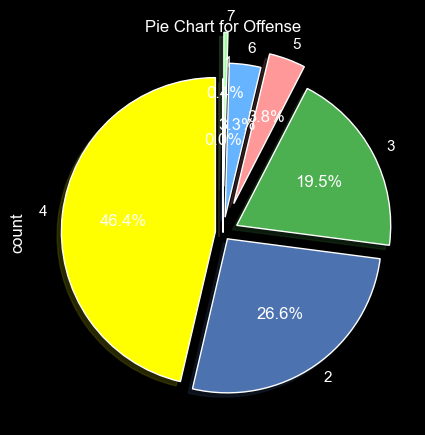

In [756]:
mycolors=["yellow","b","#4CAF50", '#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
data["offense_new"].value_counts().plot.pie(explode=[0.05,0.05,0.1,0.2,0.1,0.3,0], colors=mycolors, autopct='%1.1f%%', startangle=90, shadow=True,figsize=(5,5))
plt.title("Pie Chart for Offense")
plt.show()

**Offenses count plot**

<Axes: xlabel='offense_new', ylabel='count'>

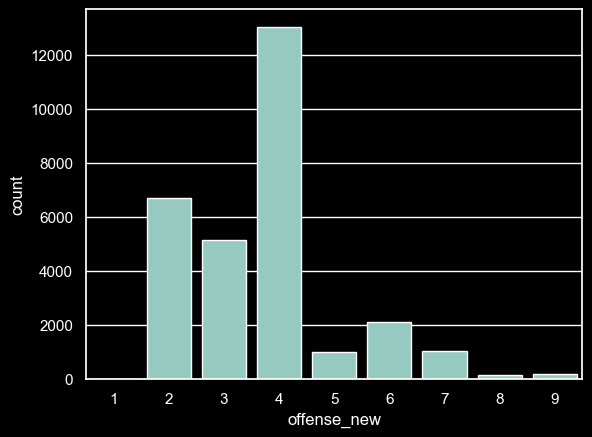

In [757]:
sns.countplot(x=df.offense_new)

**Trend between Offenses and Shift**

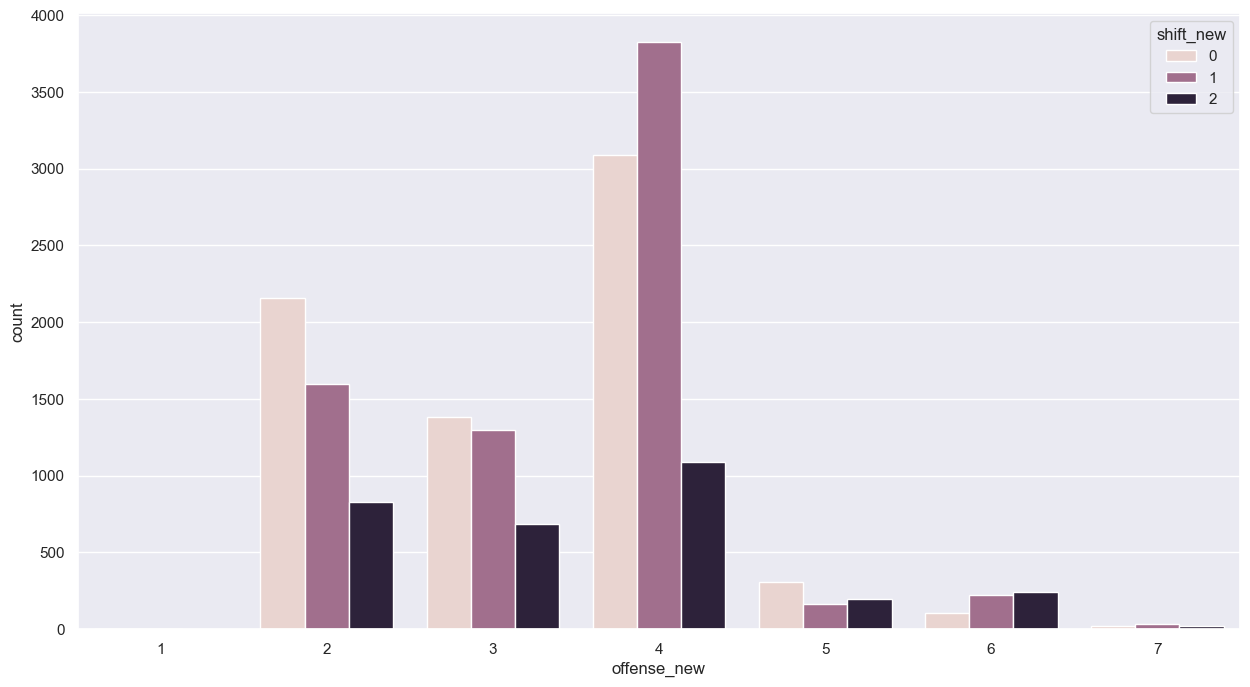

In [758]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,8))
ax = sns.countplot(x='offense_new', hue="shift_new", data=data)
plt.show()

In [759]:
data.groupby(['offense_new'])['shift_new'].mean().sort_values(ascending=False).head(10)

offense_new
6    1.239016
7    1.000000
5    0.832073
3    0.793278
4    0.749812
2    0.709860
1    0.666667
Name: shift_new, dtype: float64

**Trend between Offence and Shift**

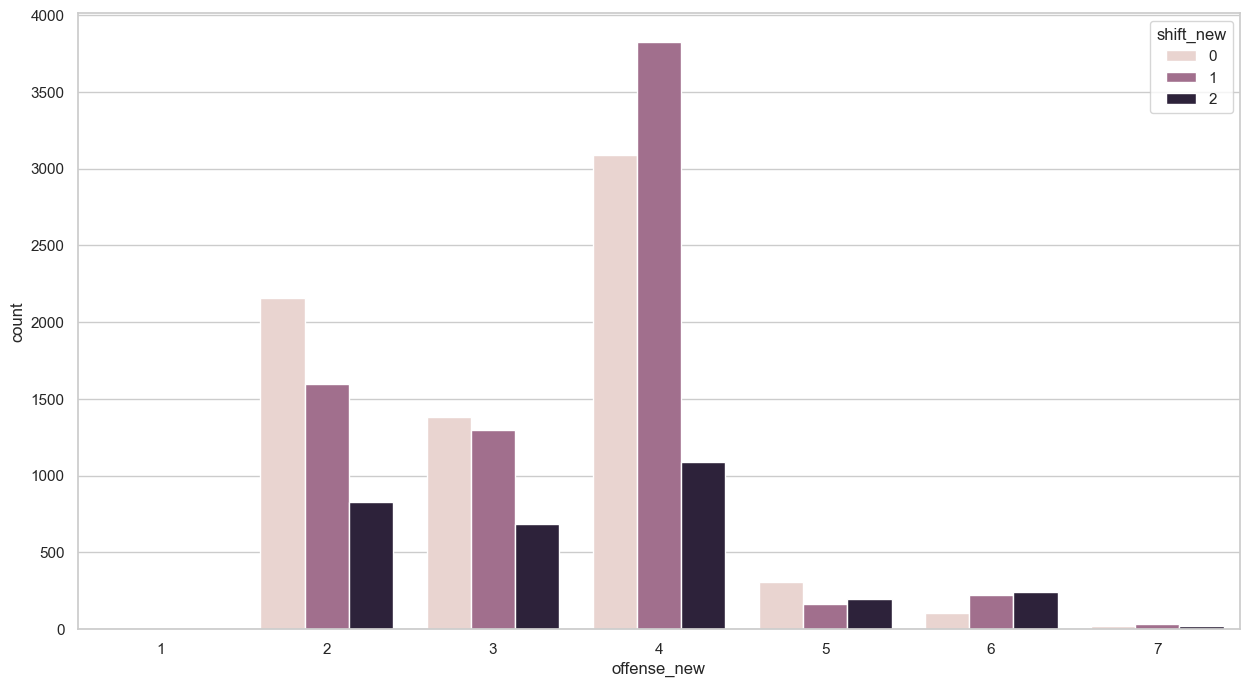

In [761]:
sns.set(style="whitegrid")
plt.figure(figsize=(15,8))
ax = sns.countplot(x='offense_new', hue="shift_new", data=data)
plt.show()

In [762]:
data.groupby(['offense_new'])['shift_new'].mean().sort_values(ascending=False).head(10)

offense_new
6    1.239016
7    1.000000
5    0.832073
3    0.793278
4    0.749812
2    0.709860
1    0.666667
Name: shift_new, dtype: float64

**Matrix plot**

In [764]:
corr_matrix=data[['offense_new','ward','shift_new']].corr()
print(corr_matrix)

             offense_new      ward  shift_new
offense_new     1.000000 -0.118957   0.081839
ward           -0.118957  1.000000  -0.062484
shift_new       0.081839 -0.062484   1.000000


<Axes: >

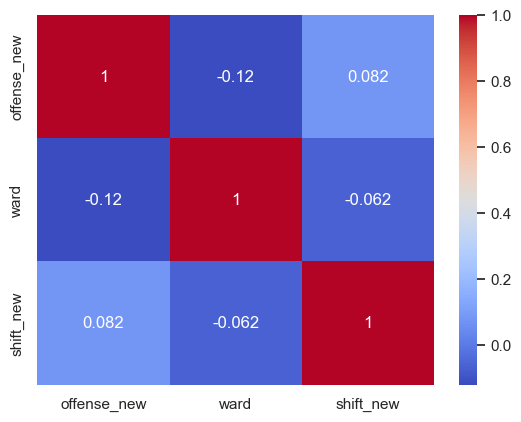

In [765]:
sns.heatmap(corr_matrix,cmap='coolwarm',annot=True)

## Spliting the Data

In [766]:
data.head()

,ccn,xblock,yblock,ward,district,psa,shift_new,cluster,month,offense_new
0,24054605,396384.27,137427.76,2.0,2.0,207.0,0,6,4,2
1,24056000,395709.91,137490.94,2.0,2.0,207.0,1,5,4,4
2,24056385,397497.55,137053.13,2.0,2.0,209.0,0,8,4,4
4,24013789,397171.11,137408.25,2.0,2.0,207.0,2,8,1,4
5,24013988,400594.86,139371.55,5.0,5.0,505.0,0,22,1,3


In [767]:
y= data['offense_new']
y

0        2
1        4
2        4
4        4
5        3
        ..
29289    4
29291    2
29292    3
29293    4
29294    3
Name: offense_new, Length: 17246, dtype: int64

In [768]:
X= data.drop('offense_new', axis=1)
X

,ccn,xblock,yblock,ward,district,psa,shift_new,cluster,month
0,24054605,396384.27000,137427.760000,2.0,2.0,207.0,0,6,4
1,24056000,395709.91000,137490.940000,2.0,2.0,207.0,1,5,4
2,24056385,397497.55000,137053.130000,2.0,2.0,209.0,0,8,4
4,24013789,397171.11000,137408.250000,2.0,2.0,207.0,2,8,1
5,24013988,400594.86000,139371.550000,5.0,5.0,505.0,0,22,1
...,...,...,...,...,...,...,...,...,...
29289,24041707,400895.69000,138267.500000,5.0,5.0,506.0,1,23,3
29291,24030573,397228.74000,137931.790000,2.0,3.0,307.0,1,7,2
29292,24033166,403784.43000,135262.060000,7.0,6.0,603.0,2,32,3
29293,24033419,396307.96000,137321.650000,2.0,2.0,207.0,0,6,3


In [769]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [770]:
X.shape

(17246, 9)

In [775]:
X_train.ndim

2

In [776]:
X_train.shape

(12072, 9)

In [777]:
X_test.shape

(5174, 9)

In [778]:
y_train.shape

(12072,)

In [779]:
y_test.shape

(5174,)

**Standarization**

In [780]:
print(df.dtypes)

ccn              int64
xblock         float64
yblock         float64
ward           float64
district       float64
psa            float64
shift_new        int64
method_new       int64
cluster          int64
month            int32
offense_new      int64
dtype: object


In [781]:
Scaler=StandardScaler()
Scaler.fit(X_train)
X_train=Scaler.fit_transform(X_train)
X_test=Scaler.fit_transform(X_test)

**1. Logistic Regression**

**Model Creation and Training**

In [782]:
lr_model=LogisticRegression()
lr_model.fit(X_train,y_train)

C:\Users\Joem Mathews\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**Prediction**

In [783]:
y_pred_lr=lr_model.predict(X_test)
y_pred_lr

array([4, 4, 3, ..., 4, 4, 4])

In [784]:
print(y_test)

148      4
12749    2
14281    3
372      3
25297    4
        ..
23595    4
6205     3
504      2
28638    3
2766     2
Name: offense_new, Length: 5174, dtype: int64


**Evaluation**

In [785]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
class_report_lr = classification_report(y_test, y_pred_lr)

C:\Users\Joem Mathews\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Joem Mathews\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Joem Mathews\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [786]:
print(f"Accuracy: {accuracy_lr:.4f}")
print("Confusion Matrix:\n", conf_matrix_lr)
print("Classification Report:\n", class_report_lr)

Accuracy: 0.4726
Confusion Matrix:
 [[ 163  167 1064    0    0    0]
 [ 110  180  723    0    0    0]
 [  96  192 2102    0    0    0]
 [  25   33  132    0    0    0]
 [  12   12  141    0    0    0]
 [   1    4   17    0    0    0]]
Classification Report:
               precision    recall  f1-score   support

           2       0.40      0.12      0.18      1394
           3       0.31      0.18      0.22      1013
           4       0.50      0.88      0.64      2390
           5       0.00      0.00      0.00       190
           6       0.00      0.00      0.00       165
           7       0.00      0.00      0.00        22

    accuracy                           0.47      5174
   macro avg       0.20      0.20      0.17      5174
weighted avg       0.40      0.47      0.39      5174



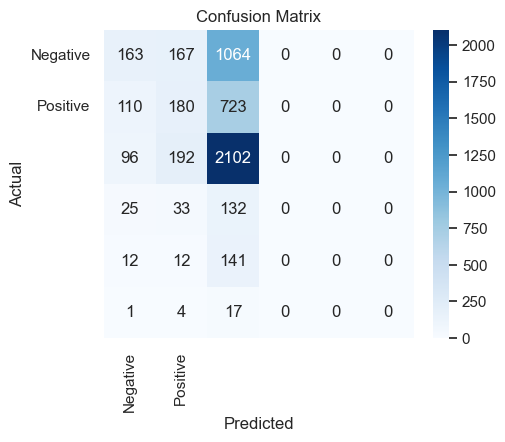

In [787]:
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Random Forest**

**Model Creation and Training**

In [788]:
rf_model=RandomForestClassifier()
rf_model.fit(X_train,y_train)

RandomForestClassifier()

**Prediction**

In [789]:
y_pred_rf=rf_model.predict(X_test)
y_pred_rf

array([4, 3, 2, ..., 4, 3, 4])

**Evaluation**

In [790]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

In [791]:
print(f"Accuracy: {accuracy_rf:.4f}")
print("Confusion Matrix:\n", conf_matrix_rf)
print("Classification Report:\n", class_report_rf)

Accuracy: 0.5187
Confusion Matrix:
 [[ 702  248  421   17    6    0]
 [ 298  353  335   12   14    1]
 [ 495  254 1599   24   17    1]
 [  52   41   76   19    2    0]
 [  43   42   61    8   11    0]
 [   6    3   13    0    0    0]]
Classification Report:
               precision    recall  f1-score   support

           2       0.44      0.50      0.47      1394
           3       0.38      0.35      0.36      1013
           4       0.64      0.67      0.65      2390
           5       0.24      0.10      0.14       190
           6       0.22      0.07      0.10       165
           7       0.00      0.00      0.00        22

    accuracy                           0.52      5174
   macro avg       0.32      0.28      0.29      5174
weighted avg       0.50      0.52      0.51      5174



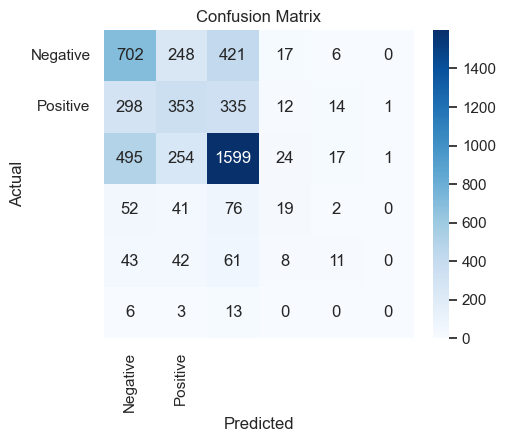

In [792]:
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**3. Decision Tree**

**Model Creation and Training**

In [793]:
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

**Prediction**

In [794]:
y_pred_dt=dt_model.predict(X_test)
y_pred_dt

array([2, 2, 3, ..., 5, 2, 3])

**Evaluation**

In [795]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
class_report_dt = classification_report(y_test, y_pred_dt)

C:\Users\Joem Mathews\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Joem Mathews\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Joem Mathews\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [796]:
print(f"Accuracy: {accuracy_dt:.4f}")
print("Confusion Matrix:\n", conf_matrix_dt)
print("Classification Report:\n", class_report_dt)

Accuracy: 0.4036
Confusion Matrix:
 [[   0    0    0    0    0    0    0]
 [   1  585  310  386   48   54   10]
 [   0  312  326  272   51   42   10]
 [   1  679  371 1138  128   67    6]
 [   0   53   46   52   26   12    1]
 [   0   35   35   68   14   13    0]
 [   0    7    4   10    1    0    0]]
Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.35      0.42      0.38      1394
           3       0.30      0.32      0.31      1013
           4       0.59      0.48      0.53      2390
           5       0.10      0.14      0.11       190
           6       0.07      0.08      0.07       165
           7       0.00      0.00      0.00        22

    accuracy                           0.40      5174
   macro avg       0.20      0.20      0.20      5174
weighted avg       0.43      0.40      0.41      5174



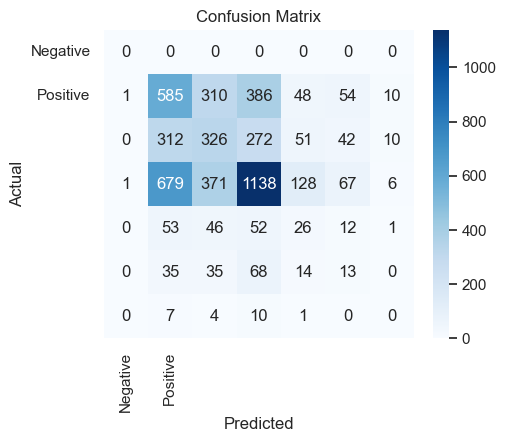

In [797]:
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**4. K-Nearest Neighbors**

**Model creation and Tarining**

In [798]:
knn_model=KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

**Prddiction**

In [799]:
y_pred_knn=knn_model.predict(X_test)
y_pred_knn

array([4, 4, 3, ..., 4, 3, 4])

In [800]:
y_test

148      4
12749    2
14281    3
372      3
25297    4
        ..
23595    4
6205     3
504      2
28638    3
2766     2
Name: offense_new, Length: 5174, dtype: int64

**Evaluation**

In [801]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)

C:\Users\Joem Mathews\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Joem Mathews\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Joem Mathews\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [802]:
print(f"Accuracy: {accuracy_knn:.4f}")
print("Confusion Matrix:\n", conf_matrix_knn)
print("Classification Report:\n", class_report_knn)

Accuracy: 0.5089
Confusion Matrix:
 [[ 634  215  536    3    6    0]
 [ 305  323  377    5    3    0]
 [ 464  246 1668    5    7    0]
 [  57   43   87    3    0    0]
 [  38   35   83    4    5    0]
 [   3    4   15    0    0    0]]
Classification Report:
               precision    recall  f1-score   support

           2       0.42      0.45      0.44      1394
           3       0.37      0.32      0.34      1013
           4       0.60      0.70      0.65      2390
           5       0.15      0.02      0.03       190
           6       0.24      0.03      0.05       165
           7       0.00      0.00      0.00        22

    accuracy                           0.51      5174
   macro avg       0.30      0.25      0.25      5174
weighted avg       0.48      0.51      0.49      5174



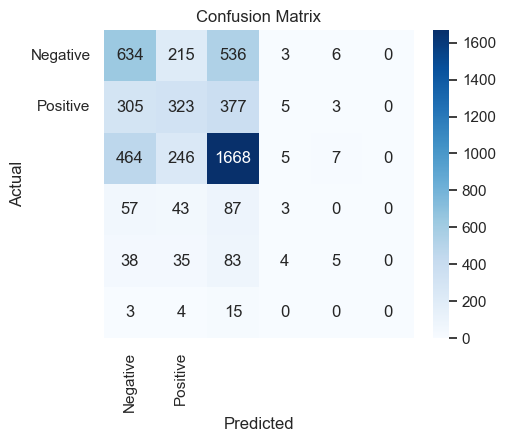

In [803]:
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Identifying the best Model

In [804]:
lr_results= pd.DataFrame(['Logistic Regression',accuracy_lr]).transpose()
lr_results.columns=['Model Name', 'Accuracy Score']
lr_results

,Model Name,Accuracy Score
0,Logistic Regression,0.472555


In [805]:
rf_results= pd.DataFrame(['Random Forest',accuracy_rf]).transpose()
rf_results.columns=['Model Name', 'Accuracy Score']
rf_results

,Model Name,Accuracy Score
0,Random Forest,0.518748


In [806]:
dt_results= pd.DataFrame(['Decision Tree',accuracy_dt]).transpose()
dt_results.columns=['Model Name', 'Accuracy Score']
dt_results

,Model Name,Accuracy Score
0,Decision Tree,0.403556


In [807]:
knn_results= pd.DataFrame(['K-Nearest Neighbors',accuracy_knn]).transpose()
knn_results.columns=['Model Name', 'Accuracy Score']
knn_results

,Model Name,Accuracy Score
0,K-Nearest Neighbors,0.508891


In [808]:
models_df= pd.concat([lr_results,rf_results,dt_results,knn_results], axis=0)
models_df.index= ['1','2','3','4']
models_df

,Model Name,Accuracy Score
1,Logistic Regression,0.472555
2,Random Forest,0.518748
3,Decision Tree,0.403556
4,K-Nearest Neighbors,0.508891
